In [372]:
import itertools
## Regular Expression
import re

## Arrays
import numpy as np

## DataFrames
import pandas as pd

## Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline

## Modeling
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from  sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from gensim.models import Word2Vec
from tqdm import tqdm

import contractions
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

# Introduction

Six different bag of words method applied with six different models
    
### Bag of Words Methods:
    * CountVectorizer
    * TfIdfVectorizer
    * HashingVectorizer
    * PCA with SMOTE Combination
    * Truncated SVD with SMOTE Combination
    * Word2Vec

### Models
    * Logistic Regression
    * Linear SVM
    * Naive Bayes
    * Kernel SVM
    * KNN
    * Random Forest
    * Gradient Boosting

### Results Summary
    * As below plots show, best "F1 Scores" have been taken via "Logistic Regression" with CountVectorizer
        - Best average F1 Score is 90 %
        - Best minority F1 score is 48 %
    * Kernel SVM and Random Forest showed poor performance over all
    * SMOTE Combinations and Word2Vec Methods didn't worked well except Logistic Regression

### Result - Max "Average F1 Scores" of All BOW Methods

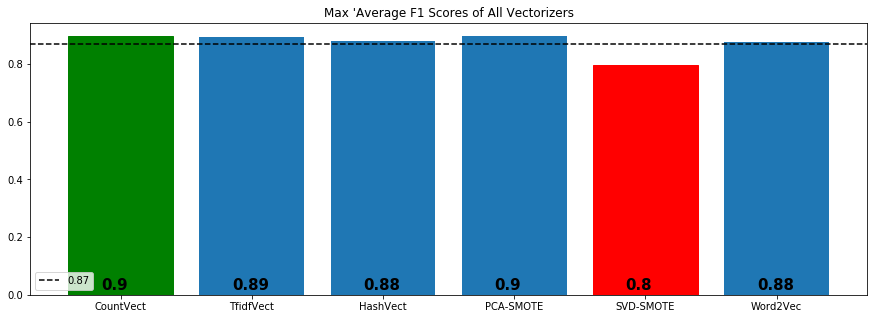

In [409]:
f1_score_bar_plot2(df=df_avg, column='vectorizer', title="Max 'Average F1 Scores of All Vectorizers")

### Result - Max "Minority Class ('bad') F1 Scores" of All BOW Methods

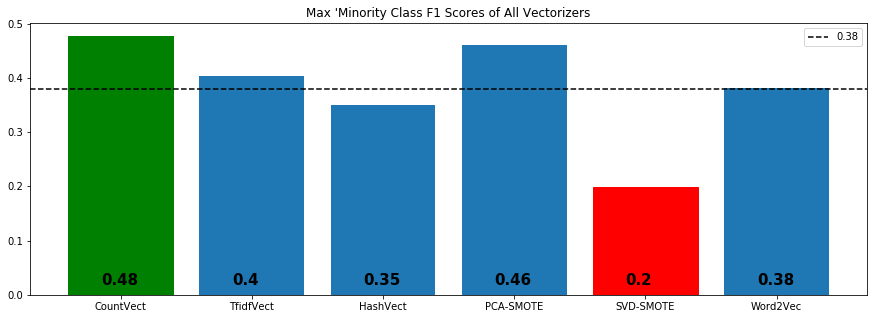

In [410]:
f1_score_bar_plot2(df=df_bad, column='vectorizer', title="Max 'Minority Class F1 Scores of All Vectorizers")

##                                                 Important note

### Due to the computing capacity limitations and overcome error interruptions; models have been run one by one instead of using pipelines, functions and loops.

# Reading the data and Preparation

In [371]:
#reading the data
df=pd.read_csv('data_capstone_2/nlp_reviews_cleaned.csv', delimiter=',')

#creating the classes
df['rating_class'] = df['rating'].apply(lambda x: 0 if x <= 2 else 1)

#train data set reduced due to capacity of computing
print(df.rating_class.value_counts())

#splitting data set into train and test sets
X = df['clean_text']
y = df['rating_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=5)

1    12080
0     1192
Name: rating_class, dtype: int64


### Confusion Matrix Function

In [3]:
def confusion_matrix_plot(y_test, y_pred, title, color):
    cm = confusion_matrix(y_test, y_pred)
    fig = plt.figure(figsize=(6, 6))
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=color)
    classNames = ['Bad','Not bad']
    plt.title(title, fontsize=20)
    plt.ylabel('True label', fontsize=20)
    plt.xlabel('Predicted label', fontsize=20)
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45, fontsize=15)
    plt.yticks(tick_marks, classNames, fontsize=15)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize=15, 
                 fontweight='bold', horizontalalignment="center")
    return plt.show()

# 1. CountVectorizer (Vectorizing the Text)

In [4]:
# Create the word vector with CountVectorizer

count_vect = CountVectorizer(ngram_range=(1,1))
count_vect_train = count_vect.fit_transform(X_train)
count_vect_train = count_vect_train.toarray()
count_vect_test = count_vect.transform(X_test)
count_vect_test = count_vect_test.toarray()

In [5]:
# Getting the vocabulary length
print('Vocabulary len :', len(count_vect.get_feature_names()))

Vocabulary len : 24998


In [6]:
vocab = count_vect.get_feature_names()

## 1.1. Logistic Regression with CountVectorizing

In [51]:
# Instantiate the classifier: logreg
logreg_cv = LogisticRegression(multi_class='multinomial', solver='newton-cg',class_weight='balanced',
                              C=0.1, n_jobs=-1, random_state=5)
# Fit it to the traning set;
logreg_cv.fit(count_vect_train, y_train)
# Predict on the test set;
y_pred_logreg_cv = logreg_cv.predict(count_vect_test)

# Compute and print the accuracy;
print('Accuarcy: {}\n'.format(metrics.accuracy_score(y_test, y_pred_logreg_cv)))

Accuarcy: 0.8890144665461122



### Classification Report

In [69]:
# Compute and print the classification report
print (classification_report(y_test, y_pred_logreg_cv))

              precision    recall  f1-score   support

           0       0.41      0.57      0.48       394
           1       0.96      0.92      0.94      4030

   micro avg       0.89      0.89      0.89      4424
   macro avg       0.68      0.74      0.71      4424
weighted avg       0.91      0.89      0.90      4424



### Confusion Matrix

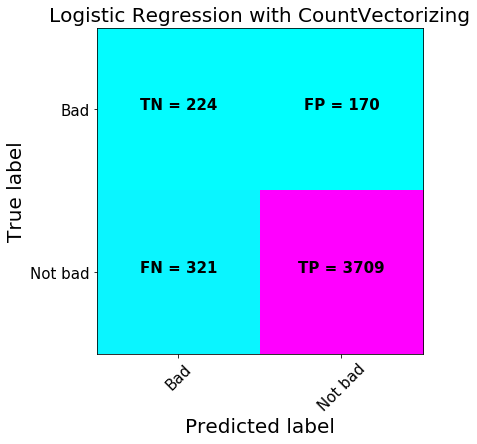

In [70]:
# Plotting the confusion matrix with "confusion_matrix_plot" function
confusion_matrix_plot(y_test, y_pred_logreg_cv, 
                      title = 'Logistic Regression with CountVectorizing', color=plt.cm.cool)

## 1.2. Linear SVM with CountVectorizing

In [11]:
# Instantiate the classifier;
svm_cv=SVC(kernel='linear')
# Fit to the training set
svm_cv.fit(count_vect_train, y_train)
# Predict on the test set;
y_pred_svm_cv = svm_cv.predict(count_vect_test)

# Compute and print the accuracy;
print('Accuarcy: {}\n'.format(metrics.accuracy_score(y_test, y_pred_svm_cv)))

Accuarcy: 0.8946654611211573



### Classification Report

In [12]:
# Compute and print the classification report
print (classification_report(y_test, y_pred_svm_cv))

              precision    recall  f1-score   support

           0       0.41      0.41      0.41       394
           1       0.94      0.94      0.94      4030

   micro avg       0.89      0.89      0.89      4424
   macro avg       0.68      0.68      0.68      4424
weighted avg       0.89      0.89      0.89      4424



### Confusion Matrix

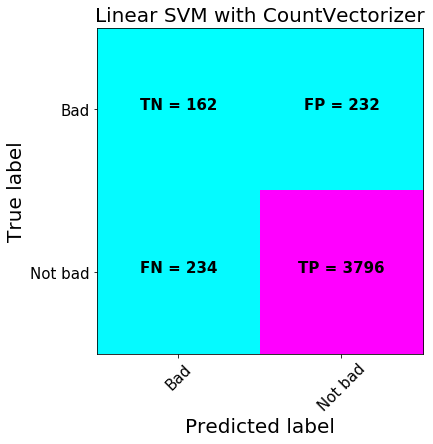

In [13]:
# Plotting the confusion matrix with "confusion_matrix_plot" function
confusion_matrix_plot(y_test, y_pred_svm_cv, title = 'Linear SVM with CountVectorizer', color=plt.cm.cool)

## 1.3. Naive Bayes with CountVectorizing

In [24]:
# Instantiate the classifier;
nb_cv = MultinomialNB()

# Fit to the training set;
nb_cv.fit(count_vect_train, y_train)

# Predict on the test set;
y_pred_nb_cv = nb_cv.predict(count_vect_test)

# Compute and print the accuracy
print('Accuarcy: {}\n'.format(metrics.accuracy_score(y_test, y_pred_nb_cv)))

Accuarcy: 0.9100361663652803



### Classification Report

In [25]:
# Compute and print the classification report
print (classification_report(y_test, y_pred_nb_cv))

              precision    recall  f1-score   support

           0       0.48      0.15      0.23       394
           1       0.92      0.98      0.95      4030

   micro avg       0.91      0.91      0.91      4424
   macro avg       0.70      0.57      0.59      4424
weighted avg       0.88      0.91      0.89      4424



### Confusion Matrix

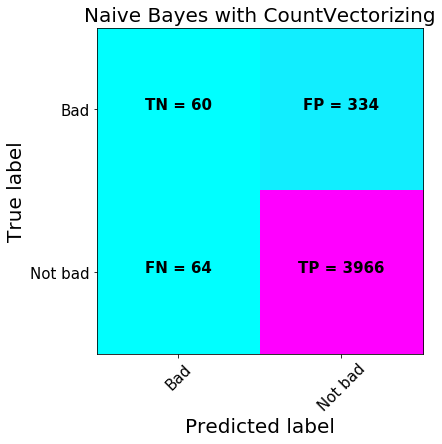

In [26]:
#Plotting the confusion matriz with "confusion_matrix_plot" function
confusion_matrix_plot(y_test, y_pred_nb_cv, title = 'Naive Bayes with CountVectorizing', color=plt.cm.cool)

## 1.4. Kernel SVM with CountVectorizing

In [27]:
# Instantiate the classifier;
ksvm_cv=SVC(kernel='rbf')

# Fit to the training set
ksvm_cv.fit(count_vect_train, y_train)

# Predict the labels of the test set;
y_pred_ksvm_cv = ksvm_cv.predict(count_vect_test)

# Compute and print the accuracy;
print('Accuarcy: {}\n'.format(metrics.accuracy_score(y_test, y_pred_ksvm_cv)))

Accuarcy: 0.9109403254972875



### Classification Report

In [28]:
# Compute and print the classification report
print (classification_report(y_test, y_pred_ksvm_cv))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       394
           1       0.91      1.00      0.95      4030

   micro avg       0.91      0.91      0.91      4424
   macro avg       0.46      0.50      0.48      4424
weighted avg       0.83      0.91      0.87      4424



### Confusion Matrix

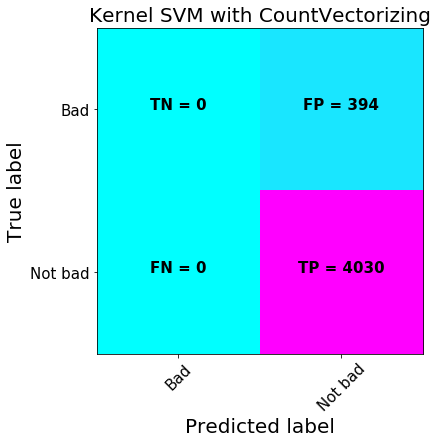

In [29]:
#Plotting the confusion matriz with "confusion_matrix_plot" function
confusion_matrix_plot(y_test, y_pred_ksvm_cv, title = 'Kernel SVM with CountVectorizing', color=plt.cm.cool)

## 1.5. KNeighbors with CountVectorizing

In [30]:
# Instantiate the classifier;
knn_cv = KNeighborsClassifier(n_neighbors=5)

# Fit it to the training set;

knn_cv.fit(count_vect_train, y_train)
# Predict on the test set;
y_pred_knn_cv = knn_cv.predict(count_vect_test)

# Compute and print the accuracy;
print('Accuarcy: {}\n'.format(metrics.accuracy_score(y_test, y_pred_knn_cv)))

Accuarcy: 0.8998643761301989



### Classification Report

In [31]:
#Compute and print the classification report
print (classification_report(y_test, y_pred_knn_cv))

              precision    recall  f1-score   support

           0       0.27      0.07      0.12       394
           1       0.92      0.98      0.95      4030

   micro avg       0.90      0.90      0.90      4424
   macro avg       0.59      0.53      0.53      4424
weighted avg       0.86      0.90      0.87      4424



### Confusion Matrix

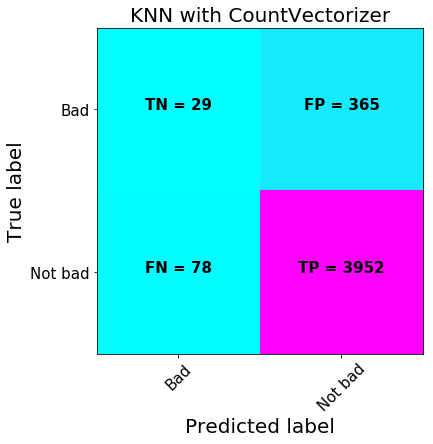

In [32]:
#Plotting the confusion matrix with "confusion_matrix_plot" function
confusion_matrix_plot(y_test, y_pred_knn_cv, title = 'KNN with CountVectorizer', color=plt.cm.cool)

## 1.6. Random Forest with CountVectorizing

In [33]:
# Hyperparameter optimzation has not been done due to the limitations

# Instantiate the classifier; 
rf_cv = RandomForestClassifier(n_estimators = 200, random_state=5)

# Fit to the training set;
rf_cv.fit(count_vect_train, y_train)

# Predict on the test set;
y_pred_rf_cv = rf_cv.predict(count_vect_test)

# Compute and print the accuracy
print('Accuarcy: {}\n'.format(metrics.accuracy_score(y_test, y_pred_rf_cv)))

Accuarcy: 0.9118444846292948



### Classification Report

In [34]:
print (classification_report(y_test, y_pred_rf_cv))

              precision    recall  f1-score   support

           0       0.75      0.02      0.03       394
           1       0.91      1.00      0.95      4030

   micro avg       0.91      0.91      0.91      4424
   macro avg       0.83      0.51      0.49      4424
weighted avg       0.90      0.91      0.87      4424



### Confusion Matrix

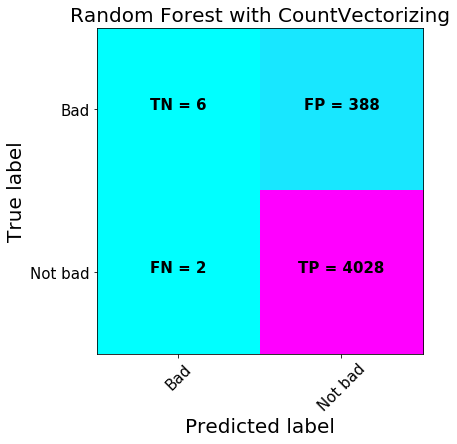

In [35]:
#Plotting the confusion matriz with "confusion_matrix_plot" function
confusion_matrix_plot(y_test, y_pred_rf_cv, title = 'Random Forest with CountVectorizing', color=plt.cm.cool)

## 1.7. Gradient Boosting with CountVectorizing

In [36]:
# Hyperparameter optimzation has not been done due to the limitations

# Instantiate the classifier; 
gb_cv = GradientBoostingClassifier()

# Fit to the training set
gb_cv.fit(count_vect_train, y_train)

# Predict on the test set;
y_pred_gb_cv = gb_cv.predict(count_vect_test)

# Compute and print the accuracy
print('Accuarcy: {}\n'.format(metrics.accuracy_score(y_test, y_pred_gb_cv)))

Accuarcy: 0.9154611211573237



### Classification Report

In [37]:
print (classification_report(y_test, y_pred_gb_cv))

              precision    recall  f1-score   support

           0       0.66      0.10      0.18       394
           1       0.92      0.99      0.96      4030

   micro avg       0.92      0.92      0.92      4424
   macro avg       0.79      0.55      0.57      4424
weighted avg       0.90      0.92      0.89      4424



### Confusion Matrix

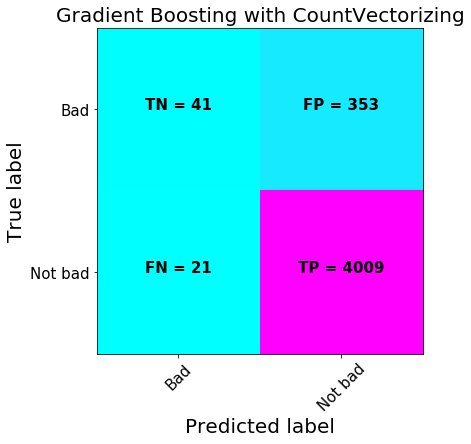

In [38]:
#Plotting the confusion matriz with "confusion_matrix_plot" function
confusion_matrix_plot(y_test, y_pred_gb_cv, title = 'Gradient Boosting with CountVectorizing', color=plt.cm.cool)

## 1.8. Comparision of CountVectorizing

### Functions for Comparision Table 

In [39]:
# Function for converting the "classification report" results to a dataframe
def pandas_classification_report(y_true, y_pred):
    metrics_summary = precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred)

    avg = list(precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred,
            average='weighted'))

    metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
    class_report_df = pd.DataFrame(
        list(metrics_summary),
        index=metrics_sum_index)

    support = class_report_df.loc['support']
    total = support.sum() 
    avg[-1] = total

    class_report_df['weighted avg'] = avg

    return class_report_df.T

# Function for adding explanatory columns and organizing all dataframe
def comparison_matrix(y_test, y_pred, label, vector):
    df = pandas_classification_report(y_test, y_pred)
    df['class']=['bad', 'not bad', 'average']
    df['accuracy']= metrics.accuracy_score(y_test, y_pred)
    df['model'] = label
    df['vectorizer'] = vector
    df = df[['vectorizer', 'model', 'accuracy', 'class', 'precision', 'recall', 'f1-score', 'support']]
    return df

In [71]:
#For loop for using "comparison functions" on "CountVectorizing" results

frames_cv = [] # empty list for collecting dataframes
y_preds_cv = [y_pred_logreg_cv, y_pred_svm_cv, y_pred_ksvm_cv, 
           y_pred_nb_cv, y_pred_knn_cv, y_pred_rf_cv, y_pred_gb_cv] #list for y_preds
labels_cv = ['LogReg', 'SVM', 'Kernel SVM', 'Naive Bayes', 'KNN', 'RForest', 'GBoost'] # list for labels
vector_cv = 'CountVect'
for y_pred, label in zip(y_preds_cv, labels_cv):
    df = comparison_matrix(y_test, y_pred, label, vector_cv)
    frames_cv.append(df)

# concatenating all dataframes
df_cv = pd.concat(frames_cv)

df_cv2 = df_cv.set_index(['vectorizer', 'model', 'accuracy', 'class'])

### Function for F1 Score Plotting

In [327]:
def f1_score_bar_plot(df, category, title):
    df = df[df['class']==category]
    x = list(df['model'])
    y = list(df['f1-score'])
    y_round = list(round(df['f1-score'],2))
    a = (list(df['f1-score'])).index(max(list(df['f1-score'])))
    z = (list(df['f1-score'])).index(min(list(df['f1-score'])))
    y_mean = round(df['f1-score'].mean(),2)
    
    plt.rcParams['figure.figsize']=[15,5]
    b_plot = plt.bar(x=x,height=y)
    b_plot[a].set_color('g')
    b_plot[z].set_color('r')
    
    for i,v in enumerate(y_round):
        plt.text(i-.15,0.018,str(v), color='black', fontsize=15, fontweight='bold')
    
    plt.axhline(y_mean,ls='--',color='k',label=y_mean)
    plt.title(title)
    plt.legend()
    
    return plt.show()

### Comparison Table - CountVectorizing

In [72]:
df_cv2

precision    recall  f1-score  \
vectorizer model       accuracy class                                    
CountVect  LogReg      0.889014 bad       0.411009  0.568528  0.477103   
                                not bad   0.956174  0.920347  0.937919   
                                average   0.907622  0.889014  0.896879   
           SVM         0.894665 bad       0.409091  0.411168  0.410127   
                                not bad   0.942403  0.941935  0.942169   
                                average   0.894907  0.894665  0.894786   
           Kernel SVM  0.910940 bad       0.000000  0.000000  0.000000   
                                not bad   0.910940  1.000000  0.953395   
                                average   0.829812  0.910940  0.868486   
           Naive Bayes 0.910036 bad       0.483871  0.152284  0.231660   
                                not bad   0.922326  0.984119  0.952221   
                                average   0.883277  0.910036  0.888048   
           KNN         0.899864 bad       0.271028  0.073604  0.115768   
                                not bad   0.915451  0.980645  0.946927   
                                average   0.858058  0.899864  0.872904   
           RForest     0.911844 bad       0.750000  0.015228  0.029851   
                                not bad   0.912138  0.999504  0.953824   
                                average   0.897698  0.911844  0.871536   
           GBoost      0.915461 bad       0.661290  0.104061  0.179825   
                                not bad   0.919074  0.994789  0.955434   
                                average   0.896116  0.915461  0.886358   

                                         support  
vectorizer model       accuracy class             
CountVect  LogReg      0.889014 bad        394.0  
                                not bad   4030.0  
                                average   4424.0  
           SVM         0.894665 bad        394.0  
                                not bad   4030.0  
                                average   4424.0  
           Kernel SVM  0.910940 bad        394.0  
                                not bad   4030.0  
                                average   4424.0  
           Naive Bayes 0.910036 bad        394.0  
                                not bad   4030.0  
                                average   4424.0  
           KNN         0.899864 bad        394.0  
                                not bad   4030.0  
                                average   4424.0  
           RForest     0.911844 bad        394.0  
                                not bad   4030.0  
                                average   4424.0  
           GBoost      0.915461 bad        394.0  
                                not bad   4030.0  
                                average   4424.0

### Average F1 Score - CountVectorizing

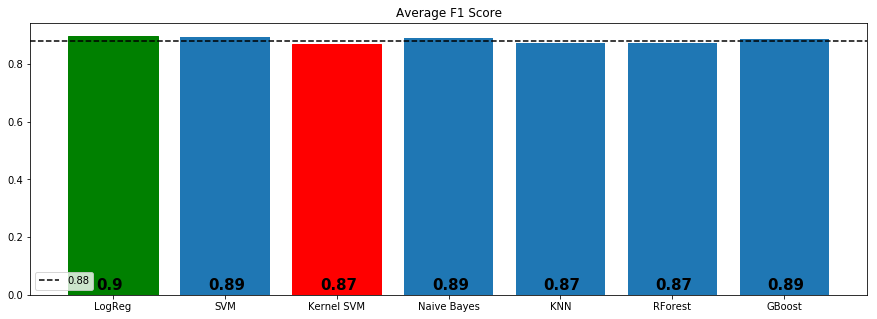

In [329]:
# Plotting f1 score with "f1_score_bar_plot" function
f1_score_bar_plot(df=df_cv, category='average', title= "Average F1 Score")

### Minority Class ('bad') F1 Score - CountVectorizing

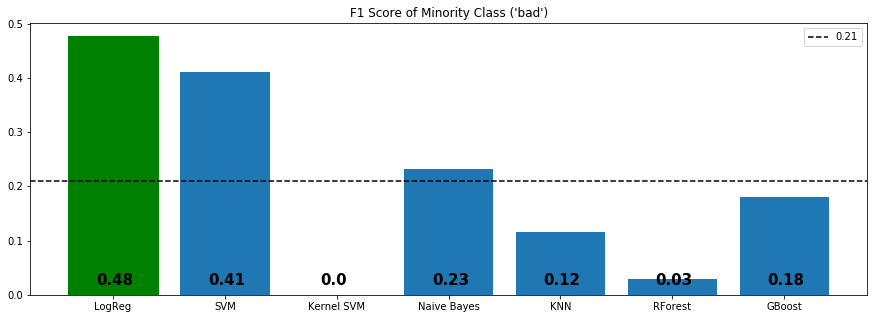

In [328]:
# Plotting f1 score of minority class ('bad') with "f1_score_bar_plot" function
f1_score_bar_plot(df=df_cv, category='bad', title= "F1 Score of Minority Class ('bad')")

# 2. TfidfVectorizer

In [46]:
tfidf_vect = TfidfVectorizer(ngram_range=(1, 1))
tfidf_vect_train = tfidf_vect.fit_transform(X_train)
tfidf_vect_train = tfidf_vect_train.toarray()
tfidf_vect_test = tfidf_vect.transform(X_test)
tfidf_vect_test = tfidf_vect_test.toarray()

## 2.1. Logistic Regression with TfidfVectorizing

In [49]:
# Instantiate a logistic regression classifier: with already defined best parameters
logreg_tv = LogisticRegression(multi_class='multinomial', solver='newton-cg',class_weight='balanced',
                              C=0.1, n_jobs=-1, random_state=5)
# Fit it to the data
logreg_tv.fit(tfidf_vect_train, y_train)
# Predict on the test data
y_pred_logreg_tv = logreg_tv.predict(tfidf_vect_test)

# Compute and print the accuracy
print('Accuarcy: {}\n'.format(metrics.accuracy_score(y_test, y_pred_logreg_tv)))

Accuarcy: 0.825497287522604



### Classification_report

In [50]:
#Compute and print the classification report
print (classification_report(y_test, y_pred_logreg_tv))

              precision    recall  f1-score   support

           0       0.29      0.66      0.40       394
           1       0.96      0.84      0.90      4030

   micro avg       0.83      0.83      0.83      4424
   macro avg       0.63      0.75      0.65      4424
weighted avg       0.90      0.83      0.85      4424



### Confusion Matrix

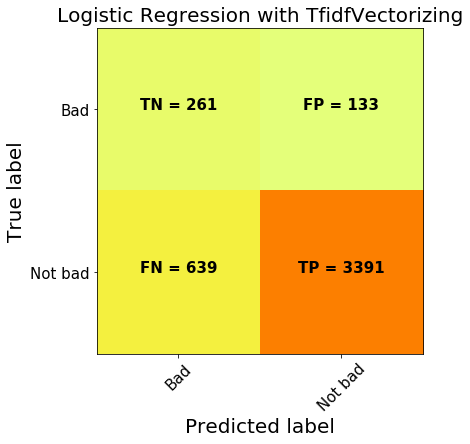

In [73]:
#Plotting the confusion matrix with "confusion_matrix_plot" function
confusion_matrix_plot(y_test, y_pred_logreg_tv, 
                      title = 'Logistic Regression with TfidfVectorizing', color=plt.cm.Wistia)

## 2.2. Linear SVM with TfidfVectorizing

In [52]:
# Instantiate a SVC classifier;
svm_tv=SVC(kernel='linear')
# Fit to the training set
svm_tv.fit(tfidf_vect_train, y_train)
# Predict on the test data
y_pred_svm_tv = svm_tv.predict(tfidf_vect_test)

# Compute and print the accuracy
print('Accuarcy: {}\n'.format(metrics.accuracy_score(y_test, y_pred_svm_tv)))

Accuarcy: 0.9204339963833634



### Classification Report

In [60]:
#Compute and print the classification report
print (classification_report(y_test, y_pred_svm_tv))

              precision    recall  f1-score   support

           0       0.78      0.15      0.25       394
           1       0.92      1.00      0.96      4030

   micro avg       0.92      0.92      0.92      4424
   macro avg       0.85      0.57      0.60      4424
weighted avg       0.91      0.92      0.89      4424



### Confusion Matrix

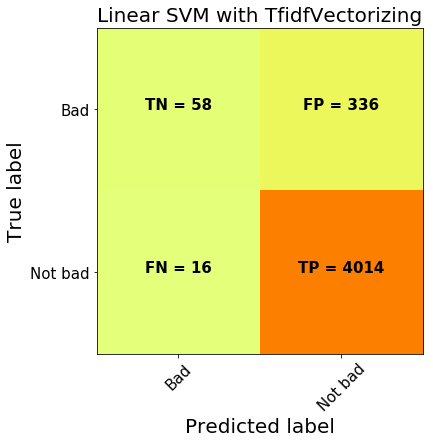

In [61]:
#Plotting the confusion matrix with "confusion_matrix_plot" function
confusion_matrix_plot(y_test, y_pred_svm_tv, 
                      title = 'Linear SVM with TfidfVectorizing', color=plt.cm.Wistia)

## 2.3. Naive Bayes with TfidfVectorizing

In [65]:
# Instantiate a naive bayes classifier:
nb_tv = MultinomialNB(alpha=100)
# Fit to the training set
nb_tv.fit(tfidf_vect_train, y_train)
# Predict the labels of the test set: y_pred
y_pred_nb_tv = nb_tv.predict(tfidf_vect_test)

# Compute and print the accuracy
print('Accuarcy: {}\n'.format(metrics.accuracy_score(y_test, y_pred_nb_tv)))

Accuarcy: 0.9109403254972875



### Classification Report

In [76]:
#Compute and print the classification report
print (classification_report(y_test, y_pred_nb_tv))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       394
           1       0.91      1.00      0.95      4030

   micro avg       0.91      0.91      0.91      4424
   macro avg       0.46      0.50      0.48      4424
weighted avg       0.83      0.91      0.87      4424



### Confusion Matrix

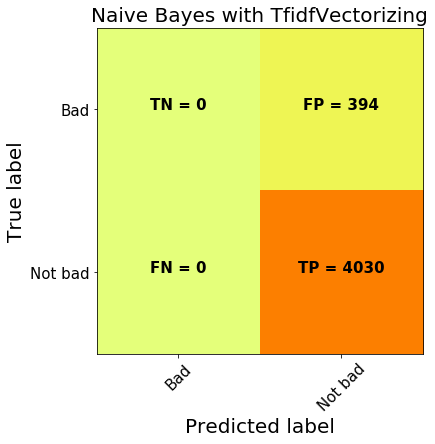

In [64]:
#Plotting the confusion matrix with "confusion_matrix_plot" function
confusion_matrix_plot(y_test, y_pred_nb_tv, 
                      title = 'Naive Bayes with TfidfVectorizing', color=plt.cm.Wistia)

## 2.4. Kernel SVM with TfidfVectorizing

In [77]:
# Instantiate a naive bayes classifier:
ksvm_tv = SVC(kernel='rbf')
# Fit to the training set
ksvm_tv.fit(tfidf_vect_train, y_train)
# Predict the labels of the test set: y_pred
y_pred_ksvm_tv = ksvm_tv.predict(tfidf_vect_test)

# Compute and print the accuracy
print('Accuarcy: {}\n'.format(metrics.accuracy_score(y_test, y_pred_ksvm_tv)))

Accuarcy: 0.9109403254972875



### Classification report

In [78]:
#Compute and print the classification report
print (classification_report(y_test, y_pred_ksvm_tv))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       394
           1       0.91      1.00      0.95      4030

   micro avg       0.91      0.91      0.91      4424
   macro avg       0.46      0.50      0.48      4424
weighted avg       0.83      0.91      0.87      4424



### Confusion Matrix

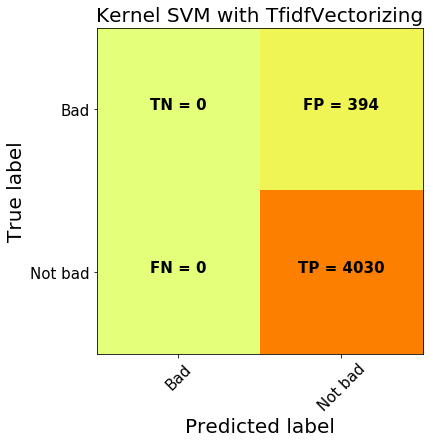

In [79]:
#Plotting the confusion matrix with "confusion_matrix_plot" function
confusion_matrix_plot(y_test, y_pred_ksvm_tv, 
                      title = 'Kernel SVM with TfidfVectorizing', color=plt.cm.Wistia)

## 2.5. KNN Classifier with TfidfVectorizing

In [55]:
# Instantiate the classifier: 
knn_tv = KNeighborsClassifier(n_neighbors=5)
# Fit it to the data
knn_tv.fit(tfidf_vect_train, y_train)
# Predict on the test data
y_pred_knn_tv = knn_tv.predict(tfidf_vect_test)

# Compute and print the scores
print('Accuarcy: {}\n'.format(metrics.accuracy_score(y_test, y_pred_knn_tv)))

Accuarcy: 0.8998643761301989



### Classification report

In [68]:
#Compute and print the classification report
print (classification_report(y_test, y_pred_knn_tv))

              precision    recall  f1-score   support

           0       0.28      0.08      0.13       394
           1       0.92      0.98      0.95      4030

   micro avg       0.90      0.90      0.90      4424
   macro avg       0.60      0.53      0.54      4424
weighted avg       0.86      0.90      0.87      4424



### Confusion Matrix

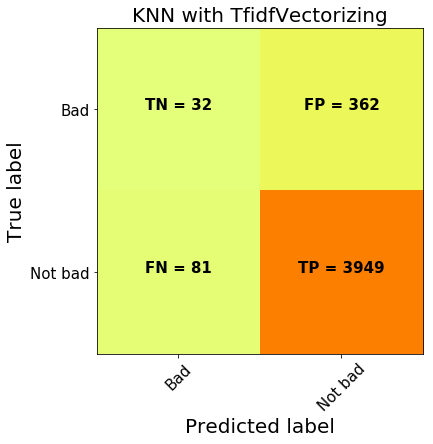

In [80]:
#Plotting the confusion matrix with "confusion_matrix_plot" function
confusion_matrix_plot(y_test, y_pred_knn_tv, 
                      title = 'KNN with TfidfVectorizing', color=plt.cm.Wistia)

## 2.6. Random Forest with TfidfVectorizing

In [56]:
# Instantiate the classifier: 
rf_tv = RandomForestClassifier(n_estimators = 200, random_state=5)
# Fit to the training set
rf_tv.fit(tfidf_vect_train, y_train)
# Predict the labels of the test set: y_pred
y_pred_rf_tv = rf_tv.predict(tfidf_vect_test)

# Compute and print the accuracy
print('Accuarcy: {}\n'.format(metrics.accuracy_score(y_test, y_pred_rf_tv)))

Accuarcy: 0.9120705244122965



### Classification report

In [81]:
#Compute and print the classification report
print (classification_report(y_test, y_pred_rf_tv))

              precision    recall  f1-score   support

           0       0.69      0.02      0.04       394
           1       0.91      1.00      0.95      4030

   micro avg       0.91      0.91      0.91      4424
   macro avg       0.80      0.51      0.50      4424
weighted avg       0.89      0.91      0.87      4424



### Confusion Matrix

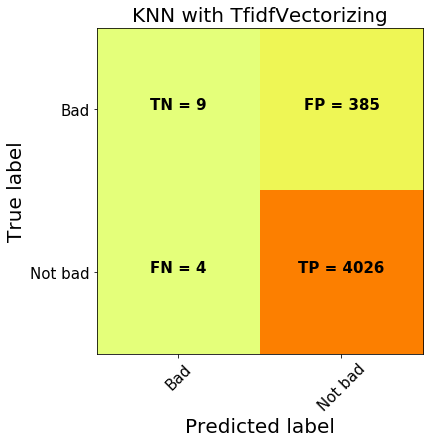

In [82]:
#Plotting the confusion matrix with "confusion_matrix_plot" function
confusion_matrix_plot(y_test, y_pred_rf_tv, 
                      title = 'KNN with TfidfVectorizing', color=plt.cm.Wistia)

## 2.7. GradientBoosting with TfidfVectorizing

In [57]:
# Instantiate the classifier; 
gb_tv = GradientBoostingClassifier()

# Fit to the training set
gb_tv.fit(tfidf_vect_train, y_train)

# Predict on the test set;
y_pred_gb_tv = gb_tv.predict(tfidf_vect_test)

# Compute and print the accuracy
print('Accuarcy: {}\n'.format(metrics.accuracy_score(y_test, y_pred_gb_tv)))

Accuarcy: 0.9136528028933092



### Classification report

In [83]:
#Compute and print the classification report
print (classification_report(y_test, y_pred_gb_tv))

              precision    recall  f1-score   support

           0       0.59      0.10      0.17       394
           1       0.92      0.99      0.95      4030

   micro avg       0.91      0.91      0.91      4424
   macro avg       0.75      0.55      0.56      4424
weighted avg       0.89      0.91      0.88      4424



### Confusion Matrix

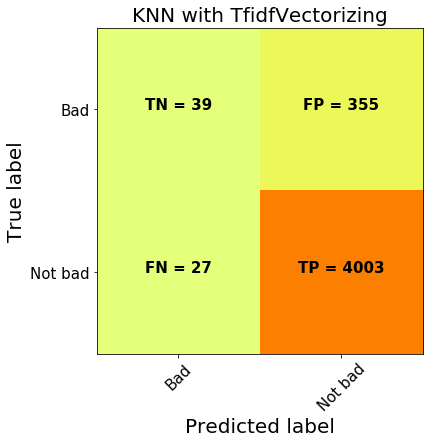

In [84]:
#Plotting the confusion matrix with "confusion_matrix_plot" function
confusion_matrix_plot(y_test, y_pred_gb_tv, 
                      title = 'KNN with TfidfVectorizing', color=plt.cm.Wistia)

## 2.8. Comparision of TfidfVectorizing

In [85]:
#For loop for using "comparison functions" on "TfidfVectorizing" results

frames_tv = [] # empty list for collecting dataframes
y_preds_tv = [y_pred_logreg_tv, y_pred_svm_tv, y_pred_ksvm_tv, 
           y_pred_nb_tv, y_pred_knn_tv, y_pred_rf_tv, y_pred_gb_tv] #list for y_preds
labels_tv = ['LogReg', 'SVM', 'Kernel SVM', 'Naive Bayes', 'KNN', 'RForest', 'GBoost'] # list for labels
vector_tv = 'TfidfVect'
for y_pred, label in zip(y_preds_tv, labels_tv):
    df = comparison_matrix(y_test, y_pred, label, vector_tv)
    frames_tv.append(df)

# concatenating all dataframes
df_tv = pd.concat(frames_tv)

df_tv2 = df_tv.set_index(['vectorizer', 'model', 'accuracy', 'class'])

### Comparison table - TfidfVectorizing

In [86]:
# Print the comparision matrix
print('\nComparision Matrix of Modeling with TfidfVectorizing\n')
df_tv2


Comparision Matrix of Modeling with TfidfVectorizing



precision    recall  f1-score  \
vectorizer model       accuracy class                                    
TfidfVect  LogReg      0.825497 bad       0.290000  0.662437  0.403400   
                                not bad   0.962259  0.841439  0.897802   
                                average   0.902388  0.825497  0.853771   
           SVM         0.920434 bad       0.783784  0.147208  0.247863   
                                not bad   0.922759  0.996030  0.957995   
                                average   0.910382  0.920434  0.894751   
           Kernel SVM  0.910940 bad       0.000000  0.000000  0.000000   
                                not bad   0.910940  1.000000  0.953395   
                                average   0.829812  0.910940  0.868486   
           Naive Bayes 0.910940 bad       0.000000  0.000000  0.000000   
                                not bad   0.910940  1.000000  0.953395   
                                average   0.829812  0.910940  0.868486   
           KNN         0.899864 bad       0.283186  0.081218  0.126233   
                                not bad   0.916029  0.979901  0.946889   
                                average   0.859668  0.899864  0.873801   
           RForest     0.912071 bad       0.692308  0.022843  0.044226   
                                not bad   0.912718  0.999007  0.953915   
                                average   0.893089  0.912071  0.872899   
           GBoost      0.913653 bad       0.590909  0.098985  0.169565   
                                not bad   0.918541  0.993300  0.954459   
                                average   0.889362  0.913653  0.884556   

                                         support  
vectorizer model       accuracy class             
TfidfVect  LogReg      0.825497 bad        394.0  
                                not bad   4030.0  
                                average   4424.0  
           SVM         0.920434 bad        394.0  
                                not bad   4030.0  
                                average   4424.0  
           Kernel SVM  0.910940 bad        394.0  
                                not bad   4030.0  
                                average   4424.0  
           Naive Bayes 0.910940 bad        394.0  
                                not bad   4030.0  
                                average   4424.0  
           KNN         0.899864 bad        394.0  
                                not bad   4030.0  
                                average   4424.0  
           RForest     0.912071 bad        394.0  
                                not bad   4030.0  
                                average   4424.0  
           GBoost      0.913653 bad        394.0  
                                not bad   4030.0  
                                average   4424.0

### Average F1 Score - TfidfVectorizing

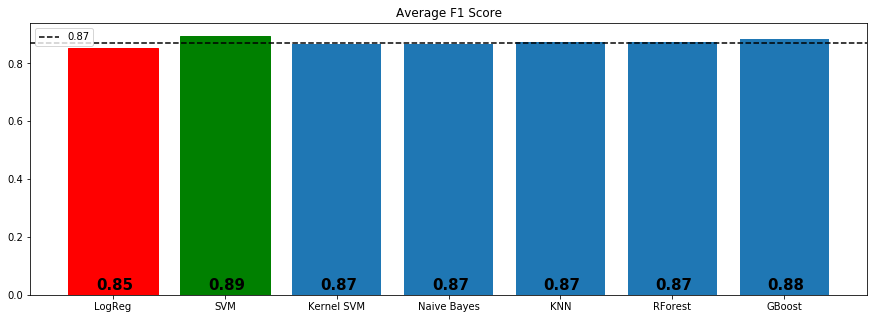

In [330]:
# Plotting f1 score with "f1_score_bar_plot" function
f1_score_bar_plot(df=df_tv, category='average', title= "Average F1 Score")

### Minority Class ('bad') F1 Score - TfidfVectorizing

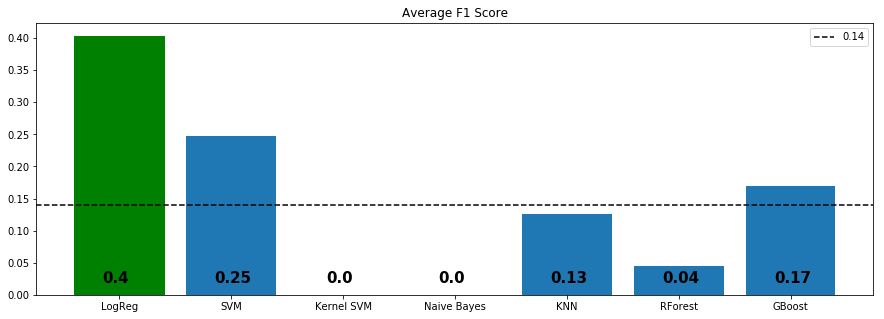

In [331]:
# Plotting f1 score with "f1_score_bar_plot" function
f1_score_bar_plot(df=df_tv, category='bad', title= "Average F1 Score")

# 3. HashingVectorizer

In [87]:
hash_vect = HashingVectorizer(n_features=2000, ngram_range=(1,1))
hash_vect_train = hash_vect.fit_transform(X_train)
hash_vect_train = hash_vect_train.toarray()
hash_vect_test = hash_vect.transform(X_test)
hash_vect_test = hash_vect_test.toarray()

## 3.1. Logistic Regression with HashingVectorizing

In [88]:
# Instantiate a logistic regression classifier;
logreg_hv = LogisticRegression(multi_class='multinomial', solver='newton-cg',class_weight='balanced',
                              C=0.1, n_jobs=-1, random_state=5)
# Fit it to the training set;
logreg_hv.fit(hash_vect_train, y_train)
# Predict on the test set;
y_pred_logreg_hv = logreg_hv.predict(hash_vect_test)

# Compute and print the accuracy
print('Accuarcy: {}\n'.format(metrics.accuracy_score(y_test, y_pred_logreg_hv)))

Accuarcy: 0.7750904159132007



### Classification report

In [89]:
#Compute and print the classification report
print (classification_report(y_test, y_pred_logreg_hv))

              precision    recall  f1-score   support

           0       0.24      0.68      0.35       394
           1       0.96      0.78      0.86      4030

   micro avg       0.78      0.78      0.78      4424
   macro avg       0.60      0.73      0.61      4424
weighted avg       0.90      0.78      0.82      4424



### Confusion Matrix

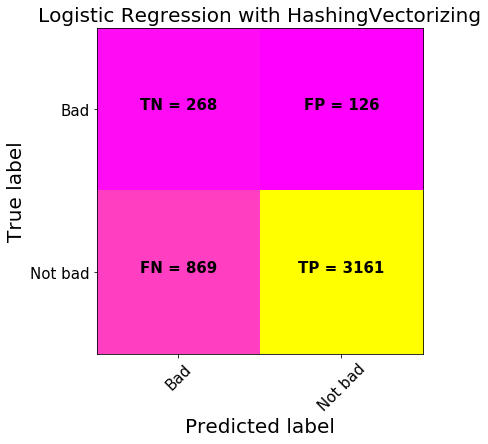

In [90]:
#Plotting the confusion matrix with "confusion_matrix_plot" function
confusion_matrix_plot(y_test, y_pred_logreg_hv, 
                      title = 'Logistic Regression with HashingVectorizing', color=plt.cm.spring)

## 3.2. Linear SVM with HashingVectorizing

In [91]:
# Instantiate a SVC classifier: with already defined best parameters
svm_hv=SVC(kernel='linear')
# Fit to the training set
svm_hv.fit(hash_vect_train, y_train)
# Predict on the test data
y_pred_svm_hv = svm_hv.predict(hash_vect_test)

# Compute and print the accuracy
print('Accuarcy: {}\n'.format(metrics.accuracy_score(y_test, y_pred_svm_hv)))

Accuarcy: 0.9134267631103075



### Classification report

In [92]:
#Compute and print the classification report
print (classification_report(y_test, y_pred_svm_hv))

              precision    recall  f1-score   support

           0       0.76      0.04      0.08       394
           1       0.91      1.00      0.95      4030

   micro avg       0.91      0.91      0.91      4424
   macro avg       0.84      0.52      0.52      4424
weighted avg       0.90      0.91      0.88      4424



### Confusion Matrix

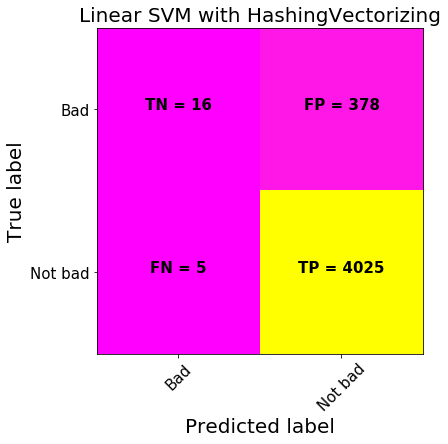

In [93]:
#Plotting the confusion matrix with "confusion_matrix_plot" function
confusion_matrix_plot(y_test, y_pred_svm_hv, 
                      title = 'Linear SVM with HashingVectorizing', color=plt.cm.spring)

## 3.3. Kernel SVM with HashVectorizing

In [94]:
# Instantiate a naive bayes classifier:
ksvm_hv = SVC(kernel='rbf')
# Fit to the training set
ksvm_hv.fit(hash_vect_train, y_train)
# Predict the labels of the test set: y_pred
y_pred_ksvm_hv = ksvm_hv.predict(hash_vect_test)

# Compute and print the accuracy
print('Accuarcy: {}\n'.format(metrics.accuracy_score(y_test, y_pred_ksvm_hv)))

Accuarcy: 0.9109403254972875



### Classification report

In [98]:
#Compute and print the classification report
print (classification_report(y_test, y_pred_ksvm_hv))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       394
           1       0.91      1.00      0.95      4030

   micro avg       0.91      0.91      0.91      4424
   macro avg       0.46      0.50      0.48      4424
weighted avg       0.83      0.91      0.87      4424



### Confusion Matrix

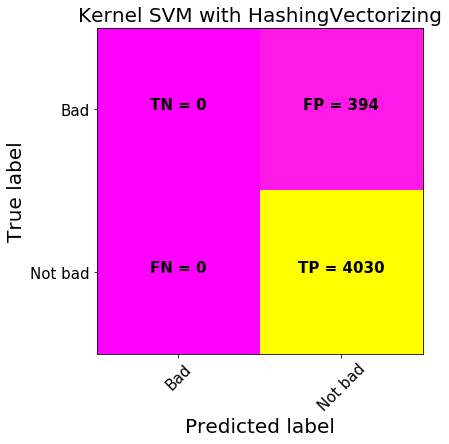

In [99]:
#Plotting the confusion matrix with "confusion_matrix_plot" function
confusion_matrix_plot(y_test, y_pred_ksvm_hv, 
                      title = 'Kernel SVM with HashingVectorizing', color=plt.cm.spring)

## 3.4. KNN Classifier with HashVectorizing

In [100]:
# Instantiate the classifier: 
knn_hv = KNeighborsClassifier(n_neighbors=5)
# Fit it to the data
knn_hv.fit(hash_vect_train, y_train)
# Predict on the test data
y_pred_knn_hv = knn_hv.predict(hash_vect_test)

# Compute and print the scores
print('Accuarcy: {}\n'.format(metrics.accuracy_score(y_test, y_pred_knn_hv)))

Accuarcy: 0.8930831826401446



### Classification report

In [102]:
#Compute and print the classification report
print (classification_report(y_test, y_pred_knn_hv))

              precision    recall  f1-score   support

           0       0.28      0.13      0.18       394
           1       0.92      0.97      0.94      4030

   micro avg       0.89      0.89      0.89      4424
   macro avg       0.60      0.55      0.56      4424
weighted avg       0.86      0.89      0.87      4424



### Confusion Matrix

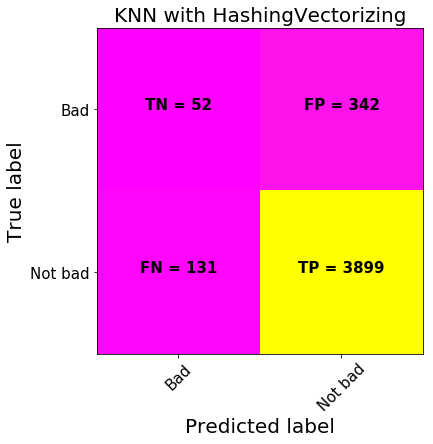

In [103]:
#Plotting the confusion matrix with "confusion_matrix_plot" function
confusion_matrix_plot(y_test, y_pred_knn_hv, 
                      title = 'KNN with HashingVectorizing', color=plt.cm.spring)

## 3.5. Random Forest with HasVectorizing

In [96]:
# Instantiate the classifier: 
rf_hv = RandomForestClassifier(n_estimators = 200, random_state=5)
# Fit to the training set
rf_hv.fit(hash_vect_train, y_train)
# Predict the labels of the test set: y_pred
y_pred_rf_hv = rf_hv.predict(hash_vect_test)

# Compute and print the accuracy
print('Accuarcy: {}\n'.format(metrics.accuracy_score(y_test, y_pred_rf_hv)))

Accuarcy: 0.9120705244122965



### Classification report

In [101]:
# Compute and print the classification report
print (classification_report(y_test, y_pred_rf_hv))

              precision    recall  f1-score   support

           0       0.69      0.02      0.04       394
           1       0.91      1.00      0.95      4030

   micro avg       0.91      0.91      0.91      4424
   macro avg       0.80      0.51      0.50      4424
weighted avg       0.89      0.91      0.87      4424



### Confusion Matrix

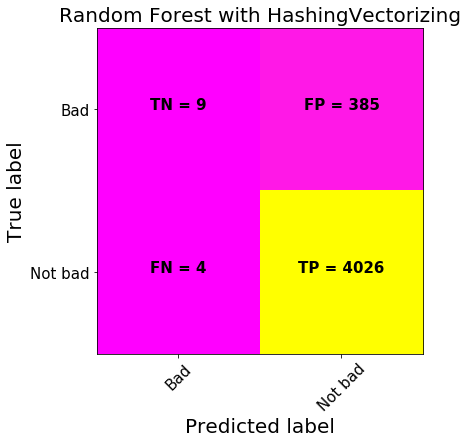

In [104]:
#Plotting the confusion matrix with "confusion_matrix_plot" function
confusion_matrix_plot(y_test, y_pred_rf_hv, 
                      title = 'Random Forest with HashingVectorizing', color=plt.cm.spring)

## 3.6. GradientBoosting with HashVectorizing

In [97]:
# Instantiate the classifier; 
gb_hv = GradientBoostingClassifier()

# Fit to the training set
gb_hv.fit(hash_vect_train, y_train)

# Predict on the test set;
y_pred_gb_hv = gb_hv.predict(hash_vect_test)

# Compute and print the accuracy
print('Accuarcy: {}\n'.format(metrics.accuracy_score(y_test, y_pred_gb_hv)))

Accuarcy: 0.9136528028933092



### Classification report

In [105]:
# Compute and print the classification report
print (classification_report(y_test, y_pred_gb_hv))

              precision    recall  f1-score   support

           0       0.64      0.07      0.13       394
           1       0.92      1.00      0.95      4030

   micro avg       0.91      0.91      0.91      4424
   macro avg       0.78      0.53      0.54      4424
weighted avg       0.89      0.91      0.88      4424



### Confusion Matrix

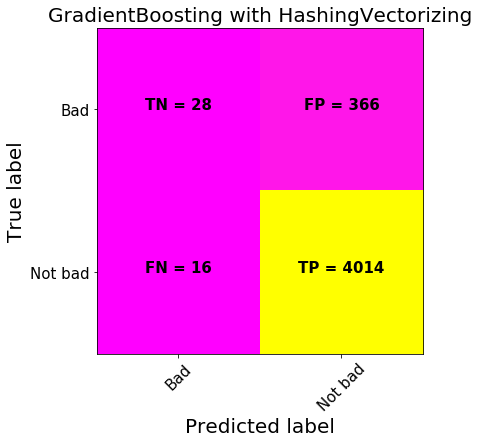

In [106]:
#Plotting the confusion matrix with "confusion_matrix_plot" function
confusion_matrix_plot(y_test, y_pred_gb_hv, 
                      title = 'GradientBoosting with HashingVectorizing', color=plt.cm.spring)

## 3.7. Comparison of HashingVectorizing

In [182]:
#For loop for using "comparison functions" on "HashingVectorizing" results

frames_hv = [] # empty list for collecting dataframes
y_preds_hv = [y_pred_logreg_hv, y_pred_svm_hv, y_pred_ksvm_hv,
           y_pred_knn_hv, y_pred_rf_hv, y_pred_gb_hv] #list for y_preds
labels_hv = ['LogReg', 'SVM', 'Kernel SVM', 'KNN', 'RForest', 'GBoost'] # list for labels
vector_hv = 'HashVect'
for y_pred, label in zip(y_preds_hv, labels_hv):
    df = comparison_matrix(y_test, y_pred, label, vector_hv)
    frames_hv.append(df)

# concatenating all dataframes
df_hv = pd.concat(frames_hv)

df_hv2 = df_hv.set_index(['vectorizer', 'model', 'accuracy', 'class'])

### Comparision Table

In [108]:
# Print the comparision matrix
print('\nComparision Matrix of Modeling with HashingVectorizing\n')
df_hv2


Comparision Matrix of Modeling with HashingVectorizing



precision    recall  f1-score  support
vectorizer model      accuracy class                                          
HashVect   LogReg     0.775090 bad       0.235708  0.680203  0.350098    394.0
                               not bad   0.961667  0.784367  0.864015   4030.0
                               average   0.897013  0.775090  0.818246   4424.0
           SVM        0.913427 bad       0.761905  0.040609  0.077108    394.0
                               not bad   0.914149  0.998759  0.954583   4030.0
                               average   0.900591  0.913427  0.876436   4424.0
           Kernel SVM 0.910940 bad       0.000000  0.000000  0.000000    394.0
                               not bad   0.910940  1.000000  0.953395   4030.0
                               average   0.829812  0.910940  0.868486   4424.0
           KNN        0.893083 bad       0.284153  0.131980  0.180243    394.0
                               not bad   0.919359  0.967494  0.942812   4030.0
                               average   0.862787  0.893083  0.874898   4424.0
           RForest    0.912071 bad       0.692308  0.022843  0.044226    394.0
                               not bad   0.912718  0.999007  0.953915   4030.0
                               average   0.893089  0.912071  0.872899   4424.0
           GBoost     0.913653 bad       0.636364  0.071066  0.127854    394.0
                               not bad   0.916438  0.996030  0.954578   4030.0
                               average   0.891495  0.913653  0.880950   4424.0

### Average F1 Score - HashingVectorizing

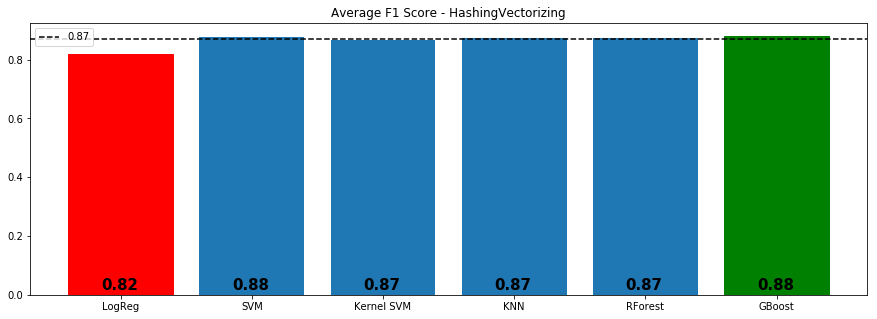

In [332]:
# Plotting f1 score with "f1_score_bar_plot" function
f1_score_bar_plot(df=df_hv, category='average', title= "Average F1 Score - HashingVectorizing")

### Minority Class ('bad') F1 Score - HashingVectorizing

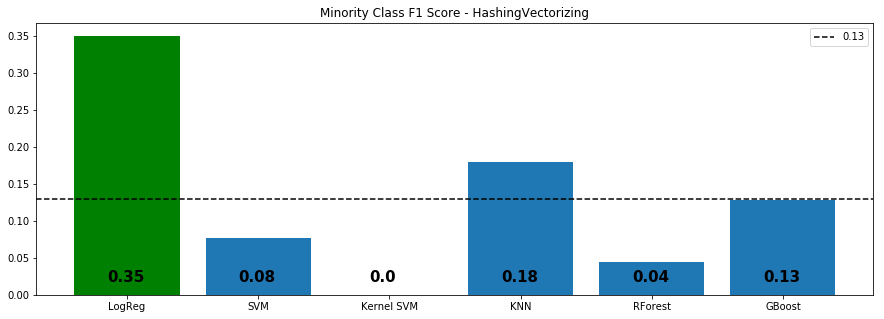

In [333]:
# Plotting f1 score with "f1_score_bar_plot" function
f1_score_bar_plot(df=df_hv, category='bad', title= "Minority Class F1 Score - HashingVectorizing")

# 4. PCA - SMOTE Combination

### First Step - PCA Application

In [126]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
pca_X_train = pca.fit_transform(count_vect_train)
pca_X_test = pca.transform(count_vect_test)

### Second Step - SMOTE Application

In [129]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=5)
df_text1, df_target1 = sm.fit_sample(pca_X_train, y_train)
#print (count_vect_train.value_counts(), np.bincount(df_target))
print (df_text1.shape)
print (df_target1.shape)

(16100, 8848)
(16100,)


In [130]:
from collections import Counter
Counter(df_target1)

Counter({0: 8050, 1: 8050})

## 4.1. Logistic Regression with PCA-SMOTE

In [131]:
# Instantiate a logistic regression classifier;
logreg_pca = LogisticRegression(multi_class='multinomial', solver='newton-cg',class_weight='balanced',
                              C=0.1, n_jobs=-1, random_state=5)
# Fit it to the training set;
logreg_pca.fit(df_text1, df_target1)
# Predict on the test set;
y_pred_logreg_pca = logreg_pca.predict(pca_X_test)

# Compute and print the accuracy
print('Accuarcy: {}\n'.format(metrics.accuracy_score(y_test, y_pred_logreg_pca)))

Accuarcy: 0.8894665461121157



### Classification report

In [132]:
# Compute and print the classification report
print (classification_report(y_test, y_pred_logreg_pca))

              precision    recall  f1-score   support

           0       0.41      0.53      0.46       394
           1       0.95      0.92      0.94      4030

   micro avg       0.89      0.89      0.89      4424
   macro avg       0.68      0.73      0.70      4424
weighted avg       0.90      0.89      0.90      4424



### Confusion Matrix

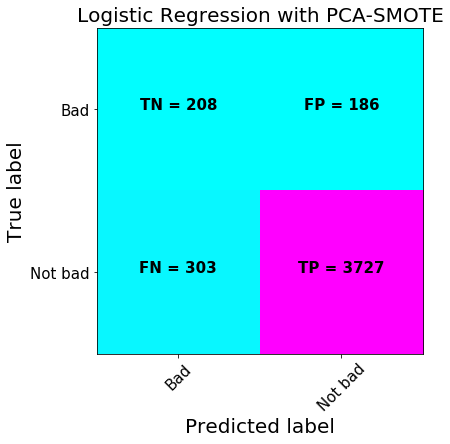

In [133]:
#Plotting the confusion matrix with "confusion_matrix_plot" function
confusion_matrix_plot(y_test, y_pred_logreg_pca, 
                      title = 'Logistic Regression with PCA-SMOTE', color=plt.cm.cool)

## 4.2. Linear SVM with PCA-SMOTE

In [134]:
# Instantiate a SVC classifier;
svm_pca=SVC(kernel='linear')
# Fit to the training set
svm_pca.fit(df_text1, df_target1)
# Predict on the test data
y_pred_svm_pca = svm_pca.predict(pca_X_test)

# Compute and print the accuracy
print('Accuarcy: {}\n'.format(metrics.accuracy_score(y_test, y_pred_svm_pca)))

Accuarcy: 0.8939873417721519



### Classification report

In [136]:
# Compute and print the classification report
print (classification_report(y_test, y_pred_svm_pca))

              precision    recall  f1-score   support

           0       0.41      0.41      0.41       394
           1       0.94      0.94      0.94      4030

   micro avg       0.89      0.89      0.89      4424
   macro avg       0.67      0.68      0.68      4424
weighted avg       0.89      0.89      0.89      4424



### Confusion Matrix

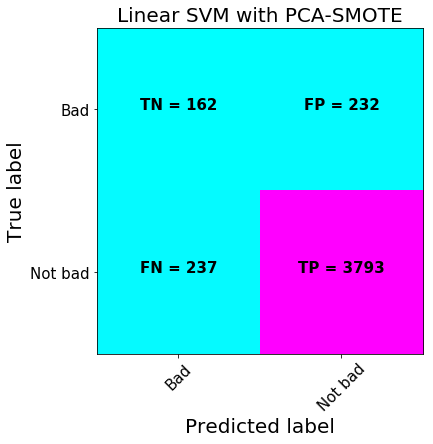

In [137]:
#Plotting the confusion matrix with "confusion_matrix_plot" function
confusion_matrix_plot(y_test, y_pred_svm_pca, 
                      title = 'Linear SVM with PCA-SMOTE', color=plt.cm.cool)

## 4.3. Kernel SVM with PCA-SMOTE 

In [138]:
# Instantiate a naive bayes classifier:
ksvm_pca = SVC(kernel='rbf')
# Fit to the training set
ksvm_pca.fit(df_text1, df_target1)
# Predict the labels of the test set: y_pred
y_pred_ksvm_pca = ksvm_pca.predict(pca_X_test)

# Compute and print the accuracy
print('Accuarcy: {}\n'.format(metrics.accuracy_score(y_test, y_pred_ksvm_pca)))

Accuarcy: 0.7208408679927667



### Classification report

In [142]:
# Compute and print the classification report
print (classification_report(y_test, y_pred_ksvm_pca))

              precision    recall  f1-score   support

           0       0.20      0.68      0.30       394
           1       0.96      0.72      0.83      4030

   micro avg       0.72      0.72      0.72      4424
   macro avg       0.58      0.70      0.56      4424
weighted avg       0.89      0.72      0.78      4424



### Confusion Matrix

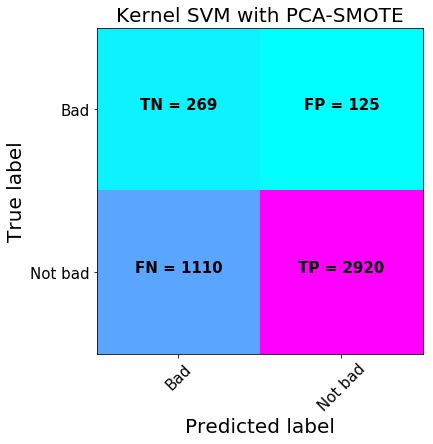

In [143]:
#Plotting the confusion matrix with "confusion_matrix_plot" function
confusion_matrix_plot(y_test, y_pred_ksvm_pca, 
                      title = 'Kernel SVM with PCA-SMOTE', color=plt.cm.cool)

## 4.4. KNN with PCA-SMOTE Combination

In [144]:
# Instantiate the classifier: 
knn_pca = KNeighborsClassifier(n_neighbors=5)
# Fit it to the data
knn_pca.fit(df_text1, df_target1)
# Predict on the test data
y_pred_knn_pca = knn_pca.predict(pca_X_test)

# Compute and print the scores
print('Accuarcy: {}\n'.format(metrics.accuracy_score(y_test, y_pred_knn_pca)))

Accuarcy: 0.3225587703435805



### Classification report

In [145]:
# Compute and print the classification report
print (classification_report(y_test, y_pred_knn_pca))

              precision    recall  f1-score   support

           0       0.11      0.93      0.20       394
           1       0.97      0.26      0.41      4030

   micro avg       0.32      0.32      0.32      4424
   macro avg       0.54      0.59      0.31      4424
weighted avg       0.90      0.32      0.40      4424



### Confusion Matrix

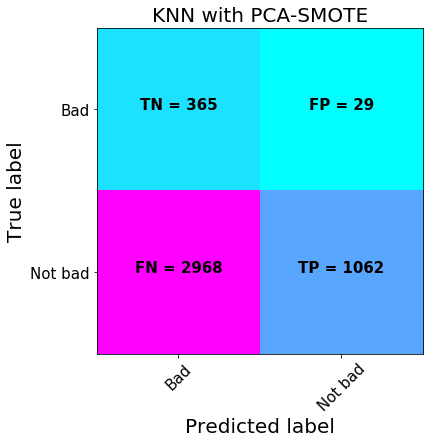

In [146]:
#Plotting the confusion matrix with "confusion_matrix_plot" function
confusion_matrix_plot(y_test, y_pred_knn_pca, 
                      title = 'KNN with PCA-SMOTE', color=plt.cm.cool)

# 4.5. Random Forest with PCA-SMOTE

In [140]:
# Instantiate the classifier: 
rf_pca = RandomForestClassifier(n_estimators = 200, random_state=5)
# Fit to the training set
rf_pca.fit(df_text1, df_target1)
# Predict the labels of the test set: y_pred
y_pred_rf_pca = rf_pca.predict(pca_X_test)

# Compute and print the accuracy
print('Accuarcy: {}\n'.format(metrics.accuracy_score(y_test, y_pred_rf_pca)))

Accuarcy: 0.903254972875226



### Classification report

In [147]:
# Compute and print the classification report
print (classification_report(y_test, y_pred_rf_pca))

              precision    recall  f1-score   support

           0       0.16      0.02      0.04       394
           1       0.91      0.99      0.95      4030

   micro avg       0.90      0.90      0.90      4424
   macro avg       0.54      0.50      0.49      4424
weighted avg       0.84      0.90      0.87      4424



### Confusion Matrix

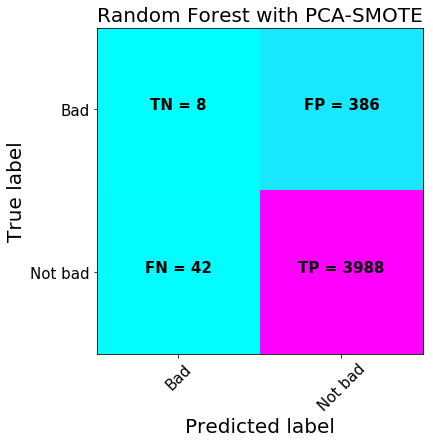

In [148]:
#Plotting the confusion matrix with "confusion_matrix_plot" function
confusion_matrix_plot(y_test, y_pred_rf_pca, 
                      title = 'Random Forest with PCA-SMOTE', color=plt.cm.cool)

## 4.6. GradientBoosting with PCA-SMOTE

In [141]:
# Instantiate the classifier; 
gb_pca = GradientBoostingClassifier()

# Fit to the training set
gb_pca.fit(df_text1, df_target1)

# Predict on the test set;
y_pred_gb_pca = gb_pca.predict(pca_X_test)

# Compute and print the accuracy
print('Accuarcy: {}\n'.format(metrics.accuracy_score(y_test, y_pred_gb_pca)))

Accuarcy: 0.8960216998191681



### Classification report

In [149]:
# Compute and print the classification report
print (classification_report(y_test, y_pred_gb_pca))

              precision    recall  f1-score   support

           0       0.18      0.05      0.07       394
           1       0.91      0.98      0.94      4030

   micro avg       0.90      0.90      0.90      4424
   macro avg       0.54      0.51      0.51      4424
weighted avg       0.85      0.90      0.87      4424



### Confusion Matrix

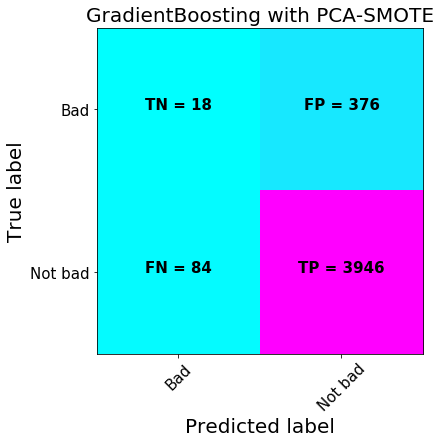

In [150]:
#Plotting the confusion matrix with "confusion_matrix_plot" function
confusion_matrix_plot(y_test, y_pred_gb_pca, 
                      title = 'GradientBoosting with PCA-SMOTE', color=plt.cm.cool)

## 4.7. Comparision of PCA-SMOTE Application

In [152]:
#For loop for using "comparison functions" on "HashingVectorizing" results

frames_pca = [] # empty list for collecting dataframes
y_preds_pca = [y_pred_logreg_pca, y_pred_svm_pca, y_pred_ksvm_pca,
               y_pred_knn_pca, y_pred_rf_pca, y_pred_gb_pca] #list for y_preds
labels_pca = ['LogReg', 'SVM', 'Kernel SVM', 'KNN', 'RForest', 'GBoost'] # list for labels
vector_pca = 'PCA-SMOTE'
for y_pred, label in zip(y_preds_pca, labels_pca):
    df = comparison_matrix(y_test, y_pred, label, vector_pca)
    frames_pca.append(df)

# concatenating all dataframes
df_pca = pd.concat(frames_pca)

df_pca2 = df_pca.set_index(['vectorizer', 'model', 'accuracy', 'class'])

### Comparision Table

In [153]:
df_pca2

precision    recall  f1-score  support
vectorizer model      accuracy class                                          
PCA-SMOTE  LogReg     0.889467 bad       0.407045  0.527919  0.459669    394.0
                               not bad   0.952466  0.924814  0.938436   4030.0
                               average   0.903891  0.889467  0.895797   4424.0
           SVM        0.893987 bad       0.406015  0.411168  0.408575    394.0
                               not bad   0.942360  0.941191  0.941775   4030.0
                               average   0.894594  0.893987  0.894289   4424.0
           Kernel SVM 0.720841 bad       0.195069  0.682741  0.303440    394.0
                               not bad   0.958949  0.724566  0.825442   4030.0
                               average   0.890918  0.720841  0.778952   4424.0
           KNN        0.322559 bad       0.109511  0.926396  0.195868    394.0
                               not bad   0.973419  0.263524  0.414763   4030.0
                               average   0.896480  0.322559  0.395268   4424.0
           RForest    0.903255 bad       0.160000  0.020305  0.036036    394.0
                               not bad   0.911751  0.989578  0.949072   4030.0
                               average   0.844801  0.903255  0.867757   4424.0
           GBoost     0.896022 bad       0.176471  0.045685  0.072581    394.0
                               not bad   0.913003  0.979156  0.944923   4030.0
                               average   0.847408  0.896022  0.867233   4424.0

### Average F1 Score - PCA_SMOTE

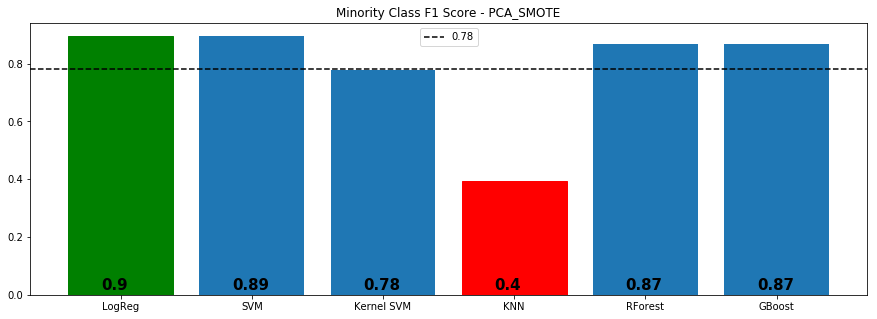

In [335]:
# Plotting f1 score with "f1_score_bar_plot" function
f1_score_bar_plot(df=df_pca, category='average', title= "Minority Class F1 Score - PCA_SMOTE")

### Minority Class ('bad') F1 Score - PCA_SMOTE

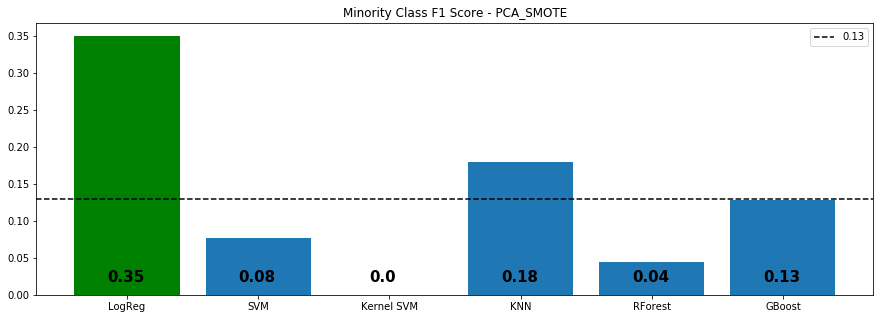

In [334]:
# Plotting f1 score with "f1_score_bar_plot" function
f1_score_bar_plot(df=df_hv, category='bad', title= "Minority Class F1 Score - PCA_SMOTE")

# 5. Truncated SVD - SMOTE Combination 

### First Step - Truncated SVD Application 

In [154]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(random_state=5)
svd_X_train = svd.fit_transform(count_vect_train)
svd_X_test = svd.transform(count_vect_test)

### Second Step - SMOTE Application

In [155]:
sm = SMOTE(random_state=5)
df_text2, df_target2 = sm.fit_sample(svd_X_train, y_train)
#print (count_vect_train.value_counts(), np.bincount(df_target))
print (df_text2.shape)
print (df_target2.shape)

(16100, 2)
(16100,)


In [157]:
Counter(df_target2)

Counter({0: 8050, 1: 8050})

## 5.1. Logistic Regression with Truncated SVD-SMOTE

In [158]:
# Instantiate a logistic regression classifier;
logreg_svd = LogisticRegression(multi_class='multinomial', solver='newton-cg',class_weight='balanced',
                              C=0.1, n_jobs=-1, random_state=5)
# Fit it to the training set;
logreg_svd.fit(df_text2, df_target2)
# Predict on the test set;
y_pred_logreg_svd = logreg_svd.predict(svd_X_test)

# Compute and print the accuracy
print('Accuarcy: {}\n'.format(metrics.accuracy_score(y_test, y_pred_logreg_svd)))

Accuarcy: 0.6747287522603979



### Classification report

In [159]:
# Compute and print the classification report
print (classification_report(y_test, y_pred_logreg_svd))

              precision    recall  f1-score   support

           0       0.12      0.44      0.19       394
           1       0.93      0.70      0.80      4030

   micro avg       0.67      0.67      0.67      4424
   macro avg       0.53      0.57      0.50      4424
weighted avg       0.86      0.67      0.74      4424



### Confusion Matrix

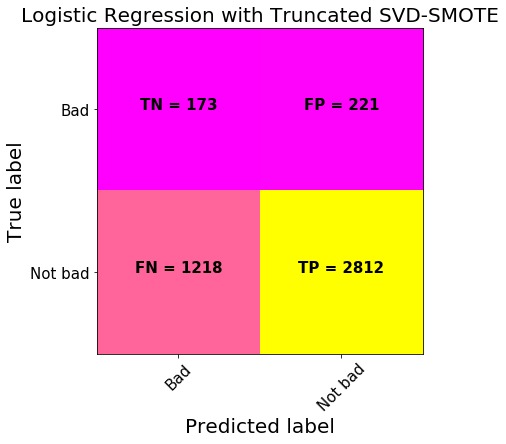

In [160]:
#Plotting the confusion matrix with "confusion_matrix_plot" function
confusion_matrix_plot(y_test, y_pred_logreg_svd, 
                      title = 'Logistic Regression with Truncated SVD-SMOTE', color=plt.cm.spring)

## 5.2. Linear SVM with Truncated SVD - SMOTE

In [161]:
# Instantiate a SVC classifier;
svm_svd = SVC(kernel='linear')
# Fit to the training set
svm_svd.fit(df_text2, df_target2)
# Predict on the test data
y_pred_svm_svd = svm_svd.predict(svd_X_test)

# Compute and print the accuracy
print('Accuarcy: {}\n'.format(metrics.accuracy_score(y_test, y_pred_svm_svd)))

Accuarcy: 0.7551989150090416



### Classification report

In [162]:
# Compute and print the classification report
print (classification_report(y_test, y_pred_svm_svd))

              precision    recall  f1-score   support

           0       0.13      0.30      0.18       394
           1       0.92      0.80      0.86      4030

   micro avg       0.76      0.76      0.76      4424
   macro avg       0.53      0.55      0.52      4424
weighted avg       0.85      0.76      0.80      4424



### Confusion Matrix

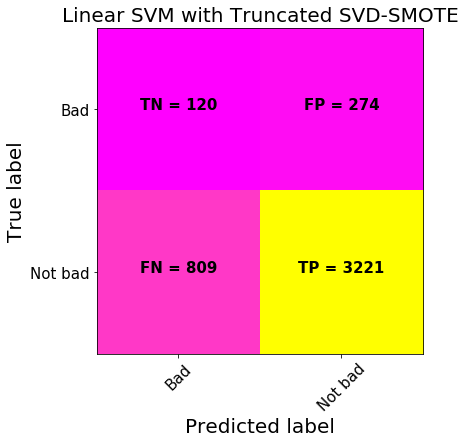

In [163]:
#Plotting the confusion matrix with "confusion_matrix_plot" function
confusion_matrix_plot(y_test, y_pred_svm_svd, 
                      title = 'Linear SVM with Truncated SVD-SMOTE', color=plt.cm.spring)

## 5.3. Kernel SVM with Truncated SVD - SMOTE

In [165]:
# Instantiate a naive bayes classifier:
ksvm_svd = SVC(kernel='rbf')
# Fit to the training set
ksvm_svd.fit(df_text2, df_target2)
# Predict the labels of the test set: y_pred
y_pred_ksvm_svd = ksvm_svd.predict(svd_X_test)

# Compute and print the accuracy
print('Accuarcy: {}\n'.format(metrics.accuracy_score(y_test, y_pred_ksvm_svd)))

Accuarcy: 0.6489602169981917



### Classification report

In [166]:
# Compute and print the classification report
print (classification_report(y_test, y_pred_ksvm_svd))

              precision    recall  f1-score   support

           0       0.12      0.47      0.19       394
           1       0.93      0.67      0.78      4030

   micro avg       0.65      0.65      0.65      4424
   macro avg       0.52      0.57      0.48      4424
weighted avg       0.86      0.65      0.72      4424



### Confusion Matrix

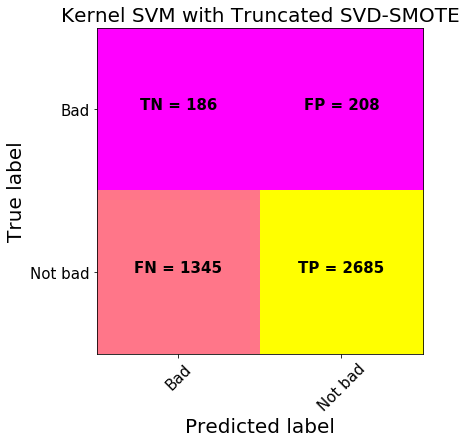

In [167]:
#Plotting the confusion matrix with "confusion_matrix_plot" function
confusion_matrix_plot(y_test, y_pred_ksvm_svd, 
                      title = 'Kernel SVM with Truncated SVD-SMOTE', color=plt.cm.spring)

## 5.4. KNN with Truncated SVD - SMOTE

In [168]:
# Instantiate the classifier: 
knn_svd = KNeighborsClassifier(n_neighbors=5)
# Fit it to the data
knn_svd.fit(df_text2, df_target2)
# Predict on the test data
y_pred_knn_svd = knn_svd.predict(svd_X_test)

# Compute and print the scores
print('Accuarcy: {}\n'.format(metrics.accuracy_score(y_test, y_pred_knn_svd)))

Accuarcy: 0.6618444846292948



### Classification report

In [169]:
# Compute and print the classification report
print (classification_report(y_test, y_pred_knn_svd))

              precision    recall  f1-score   support

           0       0.12      0.42      0.18       394
           1       0.92      0.69      0.79      4030

   micro avg       0.66      0.66      0.66      4424
   macro avg       0.52      0.55      0.48      4424
weighted avg       0.85      0.66      0.73      4424



### Confusion Matrix

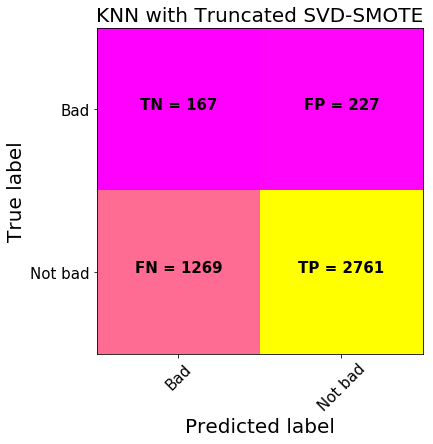

In [170]:
#Plotting the confusion matrix with "confusion_matrix_plot" function
confusion_matrix_plot(y_test, y_pred_knn_svd, 
                      title = 'KNN with Truncated SVD-SMOTE', color=plt.cm.spring)

## 5.5. Random Forest with Truncated SVD - SMOTE

In [171]:
# Instantiate the classifier: 
rf_svd = RandomForestClassifier(n_estimators = 200, random_state=5)
# Fit to the training set
rf_svd.fit(df_text2, df_target2)
# Predict the labels of the test set: y_pred
y_pred_rf_svd = rf_svd.predict(svd_X_test)

# Compute and print the accuracy
print('Accuarcy: {}\n'.format(metrics.accuracy_score(y_test, y_pred_rf_svd)))

Accuarcy: 0.7018535262206148



### Classification report

In [172]:
# Compute and print the classification report
print (classification_report(y_test, y_pred_rf_svd))

              precision    recall  f1-score   support

           0       0.12      0.36      0.18       394
           1       0.92      0.74      0.82      4030

   micro avg       0.70      0.70      0.70      4424
   macro avg       0.52      0.55      0.50      4424
weighted avg       0.85      0.70      0.76      4424



### Confusion Matrix

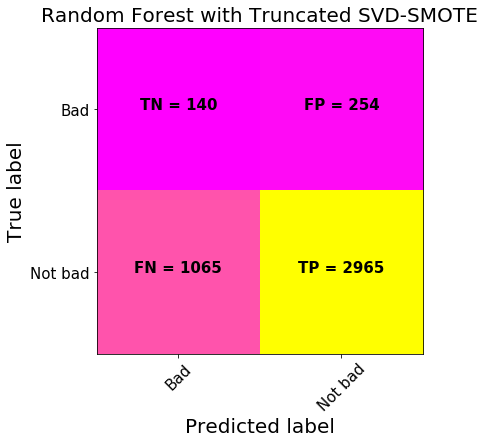

In [173]:
#Plotting the confusion matrix with "confusion_matrix_plot" function
confusion_matrix_plot(y_test, y_pred_rf_svd, 
                      title = 'Random Forest with Truncated SVD-SMOTE', color=plt.cm.spring)

## 5.6. GradientBoosting with Truncated SVD - SMOTE

In [174]:
# Instantiate the classifier; 
gb_svd = GradientBoostingClassifier()

# Fit to the training set
gb_svd.fit(df_text2, df_target2)

# Predict on the test set;
y_pred_gb_svd = gb_svd.predict(svd_X_test)

# Compute and print the accuracy
print('Accuarcy: {}\n'.format(metrics.accuracy_score(y_test, y_pred_gb_svd)))

Accuarcy: 0.5709764918625678



### Classification report

In [175]:
# Compute and print the classification report
print (classification_report(y_test, y_pred_gb_svd))

              precision    recall  f1-score   support

           0       0.12      0.60      0.20       394
           1       0.94      0.57      0.71      4030

   micro avg       0.57      0.57      0.57      4424
   macro avg       0.53      0.58      0.45      4424
weighted avg       0.86      0.57      0.66      4424



### Confusion Matrix

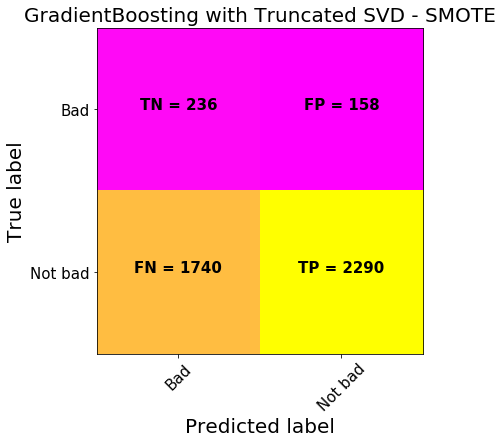

In [176]:
#Plotting the confusion matrix with "confusion_matrix_plot" function
confusion_matrix_plot(y_test, y_pred_gb_svd, 
                      title = 'GradientBoosting with Truncated SVD - SMOTE', color=plt.cm.spring)

## 5.7. Comparision of PCA-SMOTE Combination

In [177]:
#For loop for using "comparison functions" on "HashingVectorizing" results

frames_svd = [] # empty list for collecting dataframes
y_preds_svd = [y_pred_logreg_svd, y_pred_svm_svd, y_pred_ksvm_svd,
               y_pred_knn_svd, y_pred_rf_svd, y_pred_gb_svd] #list for y_preds
labels_svd = ['LogReg', 'SVM', 'Kernel SVM', 'KNN', 'RForest', 'GBoost'] # list for labels
vector_svd = 'SVD-SMOTE'
for y_pred, label in zip(y_preds_svd, labels_svd):
    df = comparison_matrix(y_test, y_pred, label, vector_svd)
    frames_svd.append(df)

# concatenating all dataframes
df_svd = pd.concat(frames_svd)

df_svd2 = df_svd.set_index(['vectorizer', 'model', 'accuracy', 'class'])

### Comparision Table

In [178]:
df_svd2

precision    recall  f1-score  support
vectorizer model      accuracy class                                          
SVD-SMOTE  LogReg     0.674729 bad       0.124371  0.439086  0.193838    394.0
                               not bad   0.927135  0.697767  0.796262   4030.0
                               average   0.855641  0.674729  0.742610   4424.0
           SVM        0.755199 bad       0.129171  0.304569  0.181406    394.0
                               not bad   0.921602  0.799256  0.856080   4030.0
                               average   0.851029  0.755199  0.795994   4424.0
           Kernel SVM 0.648960 bad       0.121489  0.472081  0.193247    394.0
                               not bad   0.928102  0.666253  0.775675   4030.0
                               average   0.856266  0.648960  0.723804   4424.0
           KNN        0.661844 bad       0.116295  0.423858  0.182514    394.0
                               not bad   0.924029  0.685112  0.786834   4030.0
                               average   0.852093  0.661844  0.733013   4424.0
           RForest    0.701854 bad       0.116183  0.355330  0.175109    394.0
                               not bad   0.921094  0.735732  0.818044   4030.0
                               average   0.849408  0.701854  0.760784   4424.0
           GBoost     0.570976 bad       0.119433  0.598985  0.199156    394.0
                               not bad   0.935458  0.568238  0.707008   4030.0
                               average   0.862783  0.570976  0.661779   4424.0

### Average F1 Score - SVD_SMOTE

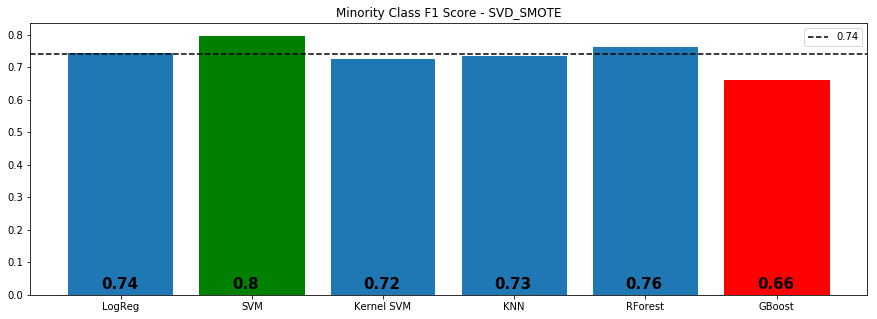

In [337]:
# Plotting f1 score with "f1_score_bar_plot" function
f1_score_bar_plot(df=df_svd, category='average', title= "Minority Class F1 Score - SVD_SMOTE")

### Minority Class ('bad') F1 Score - SVD_SMOTE

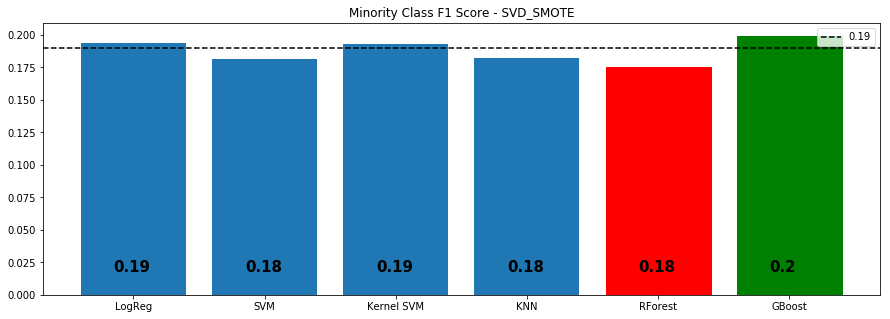

In [336]:
# Plotting f1 score with "f1_score_bar_plot" function
f1_score_bar_plot(df=df_svd, category='bad', title= "Minority Class F1 Score - SVD_SMOTE")

# 6. Word2Vec

In [373]:
dfw = df.drop(['Unnamed: 0', 'customer', 'product', 'rating', 'time', 'pos_feedback',
       'neg_feedback', 'review_text'], axis=1)

df_train = dfw[:10000]
df_test = dfw[10000:]

In [374]:
tmp_corpus = df_train['clean_text'].map(lambda x: x.split('.'))

# corpus [[w1,w2,w3..],[..]]
corpus = []
for i in tqdm(range(len(tmp_corpus))):
    for line in tmp_corpus[i]:
        words = [x for x in line.split()]
        corpus.append(words)

100%|██████████| 10000/10000 [00:00<00:00, 11467.34it/s]


In [375]:
num_of_sentences = len(corpus)
num_of_words = 0
for line in corpus:
    num_of_words += len(line)

print('Num of sentences - %s'%(num_of_sentences))
print('Num of words - %s'%(num_of_words))

Num of sentences - 10000
Num of words - 802399


In [376]:
# sg - skip gram |  window = size of the window | size = vector dimension
size = 300
window_size = 2 # sentences weren't too long, so
epochs = 100
min_count = 1
workers = 4

# train word2vec model using gensim
model = Word2Vec(corpus, sg=1,window=window_size,size=size,
                 min_count=min_count,workers=workers,iter=epochs,sample=0.01)

In [ ]:
model.most_similar('hose')

In [377]:
model.wv.syn0.shape

(25974, 300)

In [378]:
def average_word_vectors(words, model, vocabulary, num_features):
    feature_vector = np.zeros((num_features,),dtype="float64")
    nwords = 0.
    
    for word in words:
        if word in vocabulary:
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model[word])
    
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
    
    return feature_vector


def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index2word)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary,
                                     num_features) for tokenized_sentence in corpus]
    return np.array(features)

In [379]:
train_corpus = df_train['clean_text'].apply(word_tokenize)

train_array = averaged_word_vectorizer(corpus=train_corpus, model=model,
                                             num_features=300)

test_corpus = df_test['clean_text'].apply(word_tokenize)

test_array = averaged_word_vectorizer(corpus=test_corpus, model=model,
                                             num_features=300)

y_test = df_test['rating_class']
y_train = df_train['rating_class']

## 6.1. Logistic Regression with Word2Vec

In [380]:
# Instantiate the classifier: logreg
logreg_wv = LogisticRegression(multi_class='multinomial', solver='newton-cg',class_weight='balanced',
                              C=0.1, n_jobs=-1, random_state=5)
# Fit it to the traning set;
logreg_wv.fit(train_array, y_train)
# Predict on the test set;
y_pred_logreg_wv = logreg_wv.predict(test_array)

# Compute and print the accuracy;
print('Accuarcy: {}\n'.format(metrics.accuracy_score(y_test, y_pred_logreg_wv)))

Accuarcy: 0.7998166259168704



### Classification report

In [383]:
#Compute and print the classification report
print (classification_report(y_test, y_pred_logreg_wv))

              precision    recall  f1-score   support

           0       0.26      0.71      0.38       286
           1       0.97      0.81      0.88      2986

   micro avg       0.80      0.80      0.80      3272
   macro avg       0.61      0.76      0.63      3272
weighted avg       0.90      0.80      0.84      3272



### Confusion Matrix

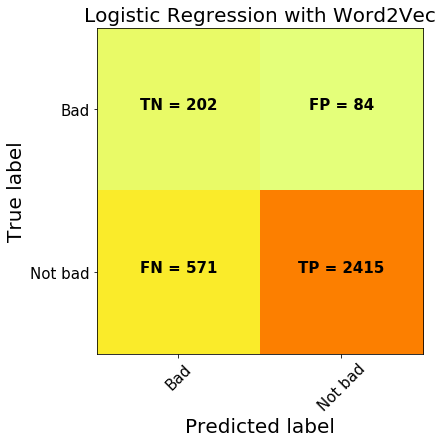

In [389]:
# Plotting the confusion matrix with "confusion_matrix_plot" function
confusion_matrix_plot(y_test, y_pred_logreg_wv, 
                      title = 'Logistic Regression with Word2Vec', color=plt.cm.Wistia)

## 6.2. Linear SVM with Word2Vec

In [381]:
# Instantiate the classifier;
svm_wv=SVC(kernel='linear')
# Fit to the training set
svm_wv.fit(train_array, y_train)
# Predict on the test set;
y_pred_svm_wv = svm_wv.predict(test_array)

# Compute and print the accuracy;
print('Accuarcy: {}\n'.format(metrics.accuracy_score(y_test, y_pred_svm_wv)))

Accuarcy: 0.9125916870415648



### Classification report

In [390]:
#Compute and print the classification report
print (classification_report(y_test, y_pred_svm_wv))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       286
           1       0.91      1.00      0.95      2986

   micro avg       0.91      0.91      0.91      3272
   macro avg       0.46      0.50      0.48      3272
weighted avg       0.83      0.91      0.87      3272



### Confusion Matrix

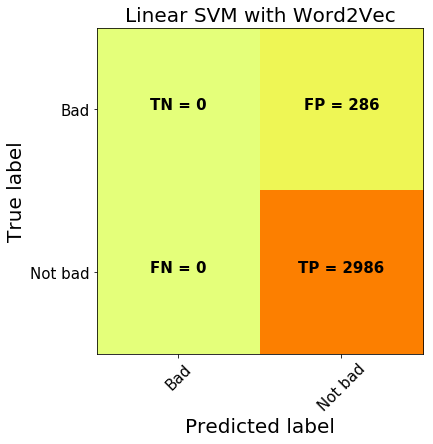

In [391]:
# Plotting the confusion matrix with "confusion_matrix_plot" function
confusion_matrix_plot(y_test, y_pred_svm_wv, 
                      title = 'Linear SVM with Word2Vec', color=plt.cm.Wistia)

## 6.3. Kernel SVM with Word2Vec

In [382]:

# Instantiate the classifier;
ksvm_wv=SVC(kernel='rbf')

# Fit to the training set
ksvm_wv.fit(train_array, y_train)

# Predict the labels of the test set;
y_pred_ksvm_wv = ksvm_wv.predict(test_array)

# Compute and print the accuracy;
print('Accuarcy: {}\n'.format(metrics.accuracy_score(y_test, y_pred_ksvm_wv)))

Accuarcy: 0.9125916870415648



### Classification Report

In [392]:
#Compute and print the classification report
print (classification_report(y_test, y_pred_ksvm_wv))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       286
           1       0.91      1.00      0.95      2986

   micro avg       0.91      0.91      0.91      3272
   macro avg       0.46      0.50      0.48      3272
weighted avg       0.83      0.91      0.87      3272



### Confusion Matrix

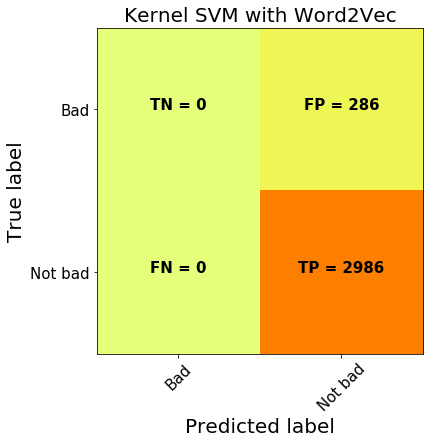

In [393]:
# Plotting the confusion matrix with "confusion_matrix_plot" function
confusion_matrix_plot(y_test, y_pred_ksvm_wv, 
                      title = 'Kernel SVM with Word2Vec', color=plt.cm.Wistia)

## 6.4. KNN with Word2Vec

In [385]:
# Instantiate the classifier;
knn_wv = KNeighborsClassifier(n_neighbors=5)

# Fit it to the training set;

knn_wv.fit(train_array, y_train)
# Predict on the test set;
y_pred_knn_wv = knn_wv.predict(test_array)

# Compute and print the accuracy;
print('Accuarcy: {}\n'.format(metrics.accuracy_score(y_test, y_pred_knn_wv)))

Accuarcy: 0.9101466992665037



### Classification Report

In [394]:
#Compute and print the classification report
print (classification_report(y_test, y_pred_knn_wv))

              precision    recall  f1-score   support

           0       0.38      0.04      0.08       286
           1       0.92      0.99      0.95      2986

   micro avg       0.91      0.91      0.91      3272
   macro avg       0.65      0.52      0.51      3272
weighted avg       0.87      0.91      0.88      3272



### Confusion Matrix

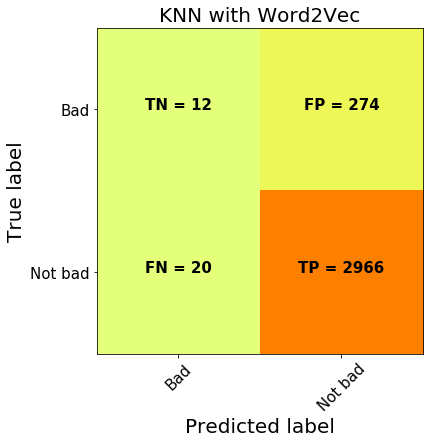

In [395]:
# Plotting the confusion matrix with "confusion_matrix_plot" function
confusion_matrix_plot(y_test, y_pred_knn_wv, 
                      title = 'KNN with Word2Vec', color=plt.cm.Wistia)

## 6.5. Random Forest with Word2Vec

In [386]:

# Hyperparameter optimzation has not been done due to the limitations

# Instantiate the classifier; 
rf_wv = RandomForestClassifier(n_estimators = 200, random_state=5)

# Fit to the training set;
rf_wv.fit(train_array, y_train)

# Predict on the test set;
y_pred_rf_wv = rf_wv.predict(test_array)

# Compute and print the accuracy
print('Accuarcy: {}\n'.format(metrics.accuracy_score(y_test, y_pred_rf_wv)))

Accuarcy: 0.9125916870415648



### Classification Report

In [396]:
#Compute and print the classification report
print (classification_report(y_test, y_pred_rf_wv))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       286
           1       0.91      1.00      0.95      2986

   micro avg       0.91      0.91      0.91      3272
   macro avg       0.46      0.50      0.48      3272
weighted avg       0.83      0.91      0.87      3272



### Confusion Matrix

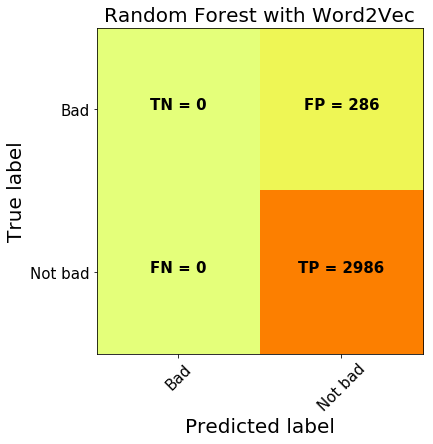

In [397]:
# Plotting the confusion matrix with "confusion_matrix_plot" function
confusion_matrix_plot(y_test, y_pred_rf_wv, 
                      title = 'Random Forest with Word2Vec', color=plt.cm.Wistia)

## 6.6. GradientBoosting with Word2Vec

In [387]:
# Instantiate the classifier; 
gb_wv = GradientBoostingClassifier()

# Fit to the training set
gb_wv.fit(train_array, y_train)

# Predict on the test set;
y_pred_gb_wv = gb_wv.predict(test_array)

# Compute and print the accuracy
print('Accuarcy: {}\n'.format(metrics.accuracy_score(y_test, y_pred_gb_wv)))

Accuarcy: 0.9119804400977995



### Classification Report

In [398]:
#Compute and print the classification report
print (classification_report(y_test, y_pred_gb_wv))

              precision    recall  f1-score   support

           0       0.40      0.01      0.03       286
           1       0.91      1.00      0.95      2986

   micro avg       0.91      0.91      0.91      3272
   macro avg       0.66      0.51      0.49      3272
weighted avg       0.87      0.91      0.87      3272



### Confusion Matrix

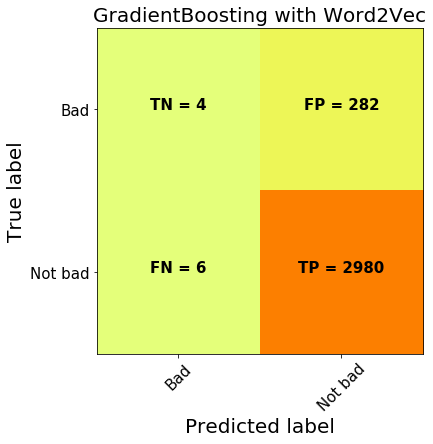

In [399]:
# Plotting the confusion matrix with "confusion_matrix_plot" function
confusion_matrix_plot(y_test, y_pred_gb_wv, 
                      title = 'GradientBoosting with Word2Vec', color=plt.cm.Wistia)

## 6.7. Comparision of Word2Vec

In [400]:
#For loop for using "comparison functions" on "HashingVectorizing" results

frames_wv = [] # empty list for collecting dataframes
y_preds_wv = [y_pred_logreg_wv, y_pred_svm_wv, y_pred_ksvm_wv,
               y_pred_knn_wv, y_pred_rf_wv, y_pred_gb_wv] #list for y_preds
labels_wv = ['LogReg', 'SVM', 'Kernel SVM', 'KNN', 'RForest', 'GBoost'] # list for labels
vector_wv = 'Word2Vec'
for y_pred, label in zip(y_preds_wv, labels_wv):
    df = comparison_matrix(y_test, y_pred, label, vector_wv)
    frames_wv.append(df)

# concatenating all dataframes
df_wv = pd.concat(frames_wv)

df_wv2 = df_wv.set_index(['vectorizer', 'model', 'accuracy', 'class'])

### Comparision Table

In [401]:
df_wv2

precision    recall  f1-score  support
vectorizer model      accuracy class                                          
Word2Vec   LogReg     0.799817 bad       0.261320  0.706294  0.381492    286.0
                               not bad   0.966387  0.808774  0.880583   2986.0
                               average   0.904758  0.799817  0.836959   3272.0
           SVM        0.912592 bad       0.000000  0.000000  0.000000    286.0
                               not bad   0.912592  1.000000  0.954298   2986.0
                               average   0.832824  0.912592  0.870885   3272.0
           Kernel SVM 0.912592 bad       0.000000  0.000000  0.000000    286.0
                               not bad   0.912592  1.000000  0.954298   2986.0
                               average   0.832824  0.912592  0.870885   3272.0
           KNN        0.910147 bad       0.375000  0.041958  0.075472    286.0
                               not bad   0.915432  0.993302  0.952779   2986.0
                               average   0.868194  0.910147  0.876095   3272.0
           RForest    0.912592 bad       0.000000  0.000000  0.000000    286.0
                               not bad   0.912592  1.000000  0.954298   2986.0
                               average   0.832824  0.912592  0.870885   3272.0
           GBoost     0.911980 bad       0.400000  0.013986  0.027027    286.0
                               not bad   0.913550  0.997991  0.953905   2986.0
                               average   0.868661  0.911980  0.872888   3272.0

### Average F1 Score - Word2Vec

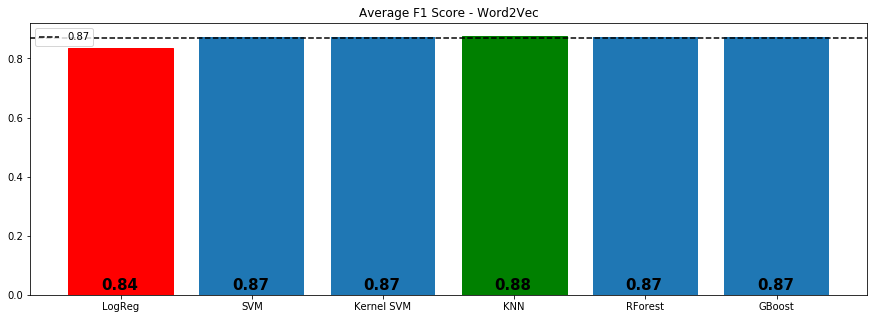

In [403]:
# Plotting f1 score with "f1_score_bar_plot" function
f1_score_bar_plot(df=df_wv, category='average', title= "Average F1 Score - Word2Vec")

### Minority Class F1 Score - Word2Vec

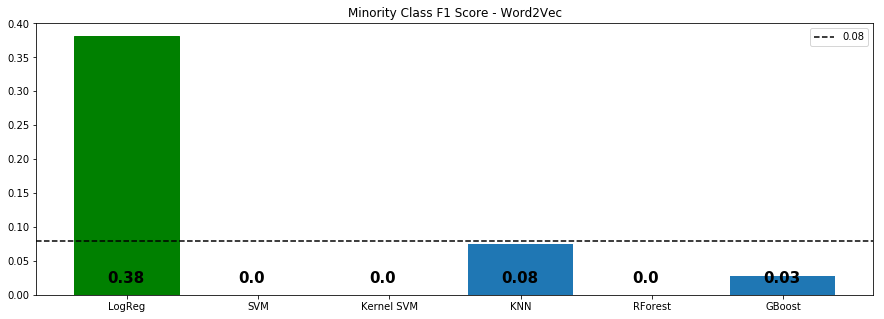

In [404]:
# Plotting f1 score with "f1_score_bar_plot" function
f1_score_bar_plot(df=df_wv, category='bad', title= "Minority Class F1 Score - Word2Vec")

# Conclusion - All

In [405]:
frames_all = frames_cv + frames_tv + frames_hv + frames_pca + frames_svd + frames_wv
df_all = pd.concat(frames_all)
df_all2 = df_all.set_index(['vectorizer', 'model', 'accuracy', 'class'])

### Comparision Table

In [406]:
print('\nComparision Table of All BOW Vectorizers\n\n')
df_all2


Comparision Table of All BOW Vectorizers




precision    recall  f1-score  \
vectorizer model       accuracy class                                    
CountVect  LogReg      0.889014 bad       0.411009  0.568528  0.477103   
                                not bad   0.956174  0.920347  0.937919   
                                average   0.907622  0.889014  0.896879   
           SVM         0.894665 bad       0.409091  0.411168  0.410127   
                                not bad   0.942403  0.941935  0.942169   
                                average   0.894907  0.894665  0.894786   
           Kernel SVM  0.910940 bad       0.000000  0.000000  0.000000   
                                not bad   0.910940  1.000000  0.953395   
                                average   0.829812  0.910940  0.868486   
           Naive Bayes 0.910036 bad       0.483871  0.152284  0.231660   
                                not bad   0.922326  0.984119  0.952221   
                                average   0.883277  0.910036  0.888048   
           KNN         0.899864 bad       0.271028  0.073604  0.115768   
                                not bad   0.915451  0.980645  0.946927   
                                average   0.858058  0.899864  0.872904   
           RForest     0.911844 bad       0.750000  0.015228  0.029851   
                                not bad   0.912138  0.999504  0.953824   
                                average   0.897698  0.911844  0.871536   
           GBoost      0.915461 bad       0.661290  0.104061  0.179825   
                                not bad   0.919074  0.994789  0.955434   
                                average   0.896116  0.915461  0.886358   
TfidfVect  LogReg      0.825497 bad       0.290000  0.662437  0.403400   
                                not bad   0.962259  0.841439  0.897802   
                                average   0.902388  0.825497  0.853771   
           SVM         0.920434 bad       0.783784  0.147208  0.247863   
                                not bad   0.922759  0.996030  0.957995   
                                average   0.910382  0.920434  0.894751   
           Kernel SVM  0.910940 bad       0.000000  0.000000  0.000000   
                                not bad   0.910940  1.000000  0.953395   
                                average   0.829812  0.910940  0.868486   
...                                            ...       ...       ...   
SVD-SMOTE  Kernel SVM  0.648960 bad       0.121489  0.472081  0.193247   
                                not bad   0.928102  0.666253  0.775675   
                                average   0.856266  0.648960  0.723804   
           KNN         0.661844 bad       0.116295  0.423858  0.182514   
                                not bad   0.924029  0.685112  0.786834   
                                average   0.852093  0.661844  0.733013   
           RForest     0.701854 bad       0.116183  0.355330  0.175109   
                                not bad   0.921094  0.735732  0.818044   
                                average   0.849408  0.701854  0.760784   
           GBoost      0.570976 bad       0.119433  0.598985  0.199156   
                                not bad   0.935458  0.568238  0.707008   
                                average   0.862783  0.570976  0.661779   
Word2Vec   LogReg      0.799817 bad       0.261320  0.706294  0.381492   
                                not bad   0.966387  0.808774  0.880583   
                                average   0.904758  0.799817  0.836959   
           SVM         0.912592 bad       0.000000  0.000000  0.000000   
                                not bad   0.912592  1.000000  0.954298   
                                average   0.832824  0.912592  0.870885   
           Kernel SVM  0.912592 bad       0.000000  0.000000  0.000000   
                                not bad   0.912592  1.000000  0.954298   
                                average   0.832824  0.912592  0.870885   
           KNN         0.910147 bad       0.3

### Funtion for F1 Score Plotting

In [364]:
def f1_score_bar_plot2(df, column, title):
    x = list(df[column])
    y = list(df['f1-score'])
    y_round = list(round(df['f1-score'],2))
    a = (list(df['f1-score'])).index(max(list(df['f1-score'])))
    z = (list(df['f1-score'])).index(min(list(df['f1-score'])))
    y_mean = round(df['f1-score'].mean(),2)
    
    plt.rcParams['figure.figsize']=[15,5]
    b_plot = plt.bar(x=x,height=y)
    b_plot[a].set_color('g')
    b_plot[z].set_color('r')
    
    for i,v in enumerate(y_round):
        plt.text(i-.15,0.018,str(v), color='black', fontsize=15, fontweight='bold')
    
    plt.axhline(y_mean,ls='--',color='k',label=y_mean)
    plt.title(title)
    plt.legend()
    
    return plt.show()

### Max "Average F1 Scores" of All Vectorizers 

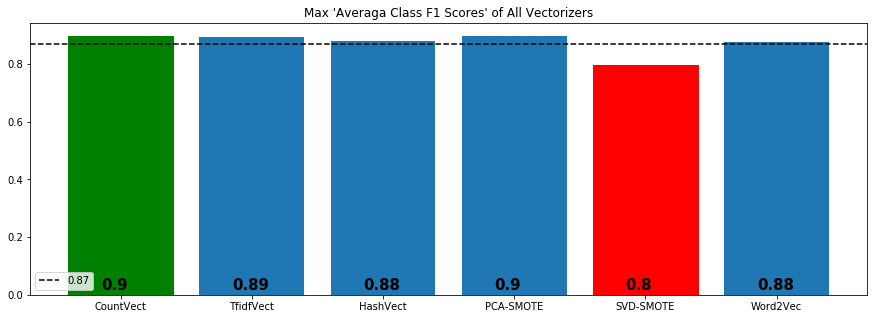

In [407]:
df_avg = df_all[df_all['class']=='average']
df_avg = df_avg.groupby(['vectorizer'], sort=False)['f1-score'].max()
df_avg = df_avg.reset_index()
f1_score_bar_plot2(df=df_avg, column='vectorizer', title="Max 'Averaga Class F1 Scores' of All Vectorizers")

### Max "Minority Class F1 Scores" of All Vectorizers

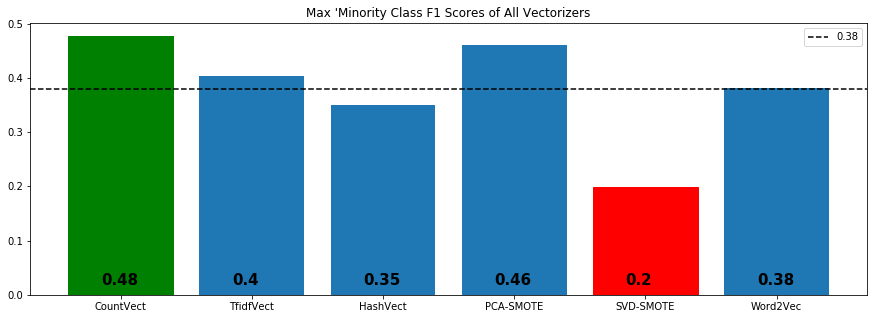

In [408]:
df_bad = df_all[df_all['class']=='bad']
df_bad = df_bad.groupby(['vectorizer'], sort=False)['f1-score'].max()
df_bad = df_bad.reset_index()
f1_score_bar_plot2(df=df_bad, column='vectorizer', title="Max 'Minority Class F1 Scores of All Vectorizers")